# Indian Premier League - Analisi di dati

## Importo librerie e lettura files .csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from collections import Counter
from matplotlib.pyplot import figure

In [2]:
deliveries = pd.read_csv('deliveries.csv', encoding='latin1')
matches = pd.read_csv('matches.csv', encoding='latin1')

In [3]:
pd.set_option('display.max_columns', None)
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [4]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


## Analisi delle features dei datasets

In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [7]:
deliveries.describe().round(2)

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.00,150460.00,150460.00,150460.00,150460.00,150460.00,150460.00,150460.00,150460.00,150460.00,150460.00,150460.00,150460.00
mean,318.28,1.48,10.14,3.62,0.00,0.04,0.00,0.02,0.00,0.00,1.22,0.07,1.29
std,182.96,0.50,5.67,1.81,0.02,0.26,0.11,0.20,0.07,0.02,1.59,0.35,1.58
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,161.00,1.00,5.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,319.00,1.00,10.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
75%,476.00,2.00,15.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
max,636.00,4.00,20.00,9.00,1.00,5.00,4.00,5.00,5.00,5.00,6.00,7.00,7.00


In [8]:
matches.describe().round(2)

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.00,636.00,636.00,636.00,636.00,0.0
mean,318.50,2012.49,0.03,13.68,3.37,NaN
std,183.74,2.77,0.16,23.91,3.42,NaN
min,1.00,2008.00,0.00,0.00,0.00,NaN
25%,159.75,2010.00,0.00,0.00,0.00,NaN
50%,318.50,2012.00,0.00,0.00,4.00,NaN
75%,477.25,2015.00,0.00,20.00,7.00,NaN
max,636.00,2017.00,1.00,146.00,10.00,NaN


In [9]:
deliveries.describe(include=[np.object])

,batting_team,bowling_team,batsman,non_striker,bowler,player_dismissed,dismissal_kind,fielder
count,150460,150460,150460,150460,150460,7438,7438,5369
unique,14,14,461,458,356,436,9,451
top,Mumbai Indians,Mumbai Indians,V Kohli,G Gambhir,Harbhajan Singh,SK Raina,caught,KD Karthik
freq,18943,18879,3494,3635,2989,134,4373,127


In [10]:
matches.describe(include=[np.object])

,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2
count,629,636,636,636,636,636,636,633,633,636,635,635
unique,30,450,14,14,14,2,3,14,201,35,44,45
top,Mumbai,2012-04-12,Mumbai Indians,Delhi Daredevils,Mumbai Indians,field,normal,Mumbai Indians,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel
freq,85,2,82,84,85,363,626,92,18,66,73,54


In [11]:
#df = pd.merge(left=deliveries, right=matches, left_on='match_id', right_on='id')

## Analisi e gestione dei missing values

In [12]:
deliveries.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         match_id  inning  batting_team  bowling_team   over   ball  batsman  \
0          False   False         False         False  False  False    False   
1          False   False         False         False  False  False    False   
2          False   False         False         False  False  False    False   
3          False   False         False         False  False  False    False   
4          False   False         False         False  False  False    False   
...          ...     ...           ...           ...    ...    ...      ...   
150455     False   False         False         False  False  False    False   
150456     False   False         False         False  False  False    False   
150457     False   False         False         False  False  False    False   
150458     False   False         False         False  False  False    False   
150459     False   False         False         False  False  False   

In [13]:
matches.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id  season   city   date  team1  team2  toss_winner  toss_decision  \
0    False   False  False  False  False  False        False          False   
1    False   False  False  False  False  False        False          False   
2    False   False  False  False  False  False        False          False   
3    False   False  False  False  False  False        False          False   
4    False   False  False  False  False  False        False          False   
..     ...     ...    ...    ...    ...    ...          ...            ...   
631  False   False  False  False  False  False        False          False   
632  False   False  False  False  False  False        False          False   
633  False   False  False  False  False  False        False          False   
634  False   False  False  False  False  False        False          False   
635  False   False  False  False  False  False        False          False   

 

In [14]:
sum(pd.isnull(matches['umpire3']))

636

In [15]:
sum(pd.isnull(deliveries['fielder']))

145091

In [16]:
def missing_values_table(matches): #creazione tabella dei missing values
        mis_val = matches.isnull().sum() #conteggio valori nulli del dataset
        mis_val_percent = 100 * matches.isnull().sum() / len(matches) #calcolo percentuale valori nulli
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percentuale MV'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentuale MV', ascending=False).round(1) #odrine crescente dei mv e arrotondare il risultato
        return mis_val_table_ren_columns

In [17]:
missing_values_table(matches)

,Missing Values,Percentuale MV
umpire3,636,100.0
city,7,1.1
winner,3,0.5
player_of_match,3,0.5
umpire1,1,0.2
umpire2,1,0.2


In [18]:
def missing_values_table(deliveries): #creazione tabella dei missing values
        mis_val = deliveries.isnull().sum()  #conteggio valori nulli del dataset
        mis_val_percent = 100 * deliveries.isnull().sum() / len(deliveries) #calcolo percentuale valori nulli
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percentuale MV'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentuale MV', ascending=False).round(1) #odrine crescente dei mv e arrotondare il risultato
        return mis_val_table_ren_columns

In [19]:
missing_values_table(deliveries)

,Missing Values,Percentuale MV
fielder,145091,96.4
player_dismissed,143022,95.1
dismissal_kind,143022,95.1


In [20]:
deliveries['fielder']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
150455        NaN
150456    NV Ojha
150457        NaN
150458        NaN
150459        NaN
Name: fielder, Length: 150460, dtype: object

### Eliminazione di alcune features contenenti un'alta percentuale di missing values

In [21]:
matches = matches.drop(columns=['umpire3']) #eliminazione della feature umpire3 nel dataset matches

In [22]:
deliveries = deliveries.drop(columns=['fielder','player_dismissed','dismissal_kind']) #eliminazione delle features fielder, player_dismissed e dismissal_kind nel dataset deliveries

In [23]:
pd.set_option('display.max_columns', None)
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


### Sostituzione dei missing values della feature city

In [24]:
matches.loc[matches['venue']=='Dubai International Cricket Stadium'] 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [25]:
matches['city'].fillna('Dubai', inplace = True)  #sostituiamo i missing values della feature city con la città Dubai, prendendo in considerazione lo stadio del match

In [26]:
matches.loc[matches['id']== 477]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
476,477,2014,Dubai,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


### Eliminazione delle righe contenenti missing values

In [27]:
matches = matches.dropna()  #eliminaimo le righe con missing values in matches

In [28]:
deliveries = deliveries.dropna() #eliminaimo le righe con missing values in deliveries

In [29]:
#missing_values_table(df)

### Trasformazione del tipo della variabile dl_applied

In [30]:
matches['dl_applied']= matches['dl_applied'].astype('bool') #trasformazione di dl_applied da int a boolean

In [31]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,False,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,False,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,False,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,False,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,False,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


## Visualizzazione delle distribuzioni delle variabili presenti in matches

### Numero di partite giocate per ogni stadio

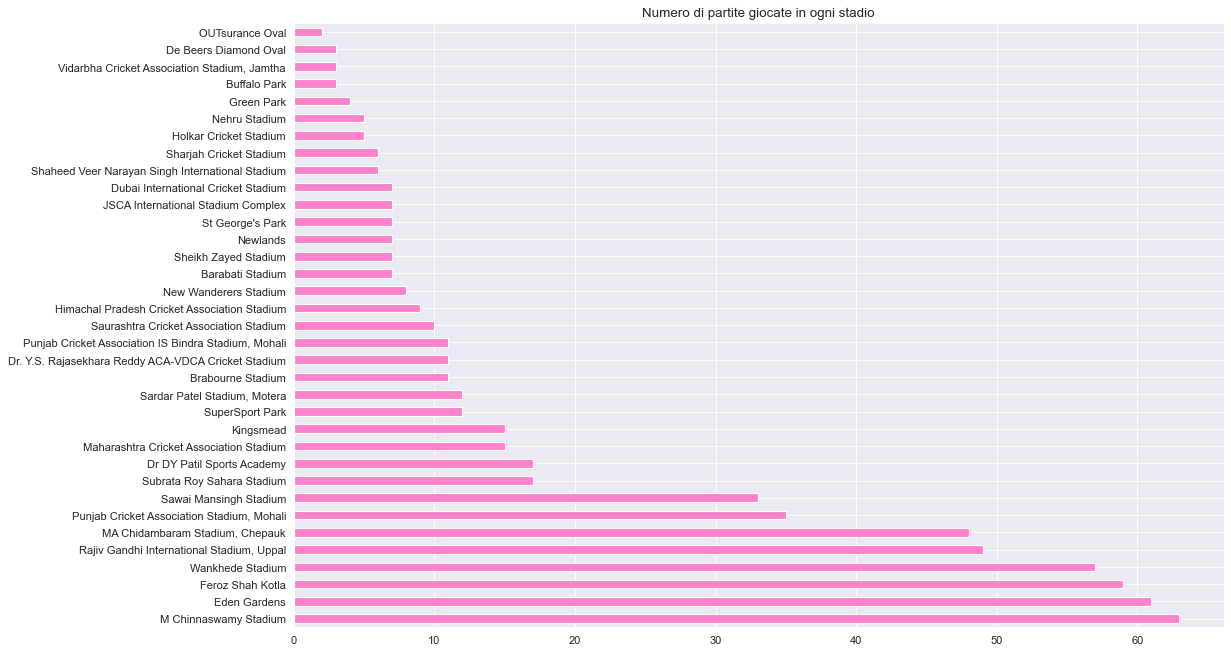

In [32]:
figure(figsize=(15,10), dpi=80)
sns.set_style('darkgrid')
matches['venue'].value_counts().sort_values(ascending=False).plot(kind='barh', color='#fe83cc', title='Numero di partite giocate in ogni stadio')
plt.show()

### Numero di partite vinte da ogni squadra

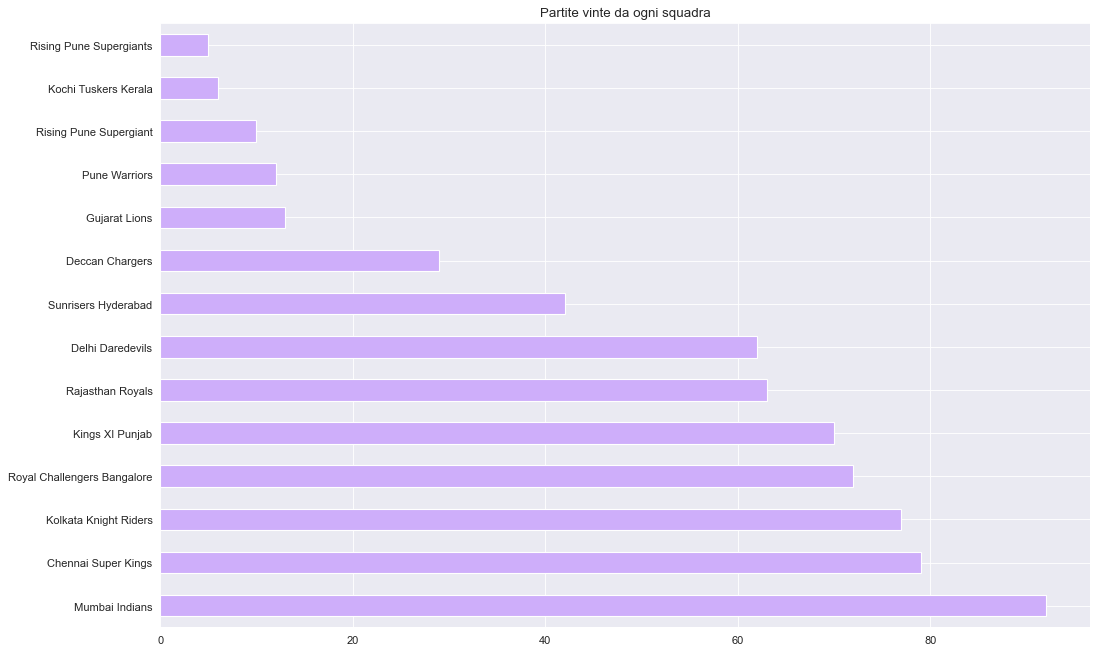

In [33]:
figure(figsize=(15,10), dpi=80)
matches['winner'].value_counts().plot(kind='barh', color='#ceaefa', title='Partite vinte da ogni squadra')
plt.show()

<AxesSubplot:title={'center':'Squadre vincitrici'}, ylabel='None'>

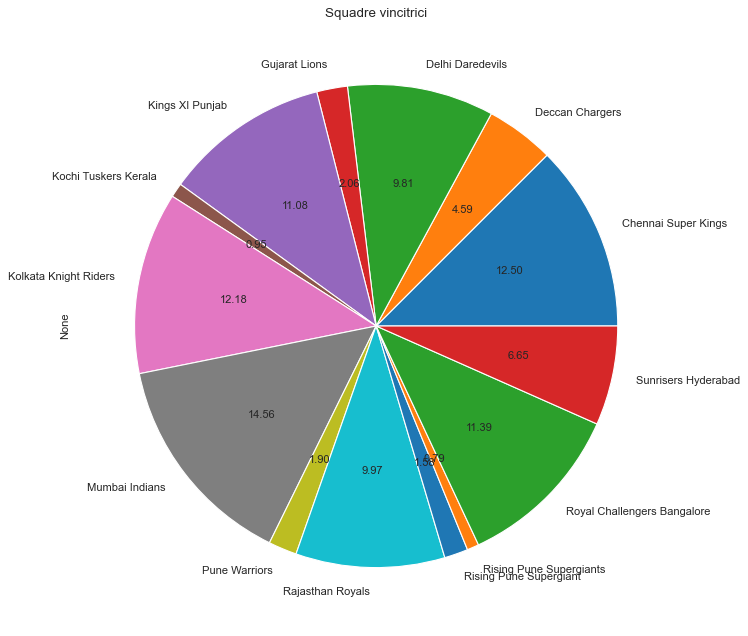

In [34]:
figure(figsize=(15,10), dpi=80)
matches.groupby(matches['winner']).size().plot(kind='pie', autopct='%.2f', title='Squadre vincitrici')

### Sostituzione dell'errore sintattico di Rising Pune Supergiants con Rising Pune Supergiant

In [35]:
matches = matches.replace(['Rising Pune Supergiants'], 'Rising Pune Supergiant') #sostituzione di Rising Pune Supergiants per superare l'errore 

In [36]:
deliveries = deliveries.replace(['Rising Pune Supergiants'], 'Rising Pune Supergiant')

In [37]:
#matches.loc[matches['winner']=='Rising Pune Supergiants']

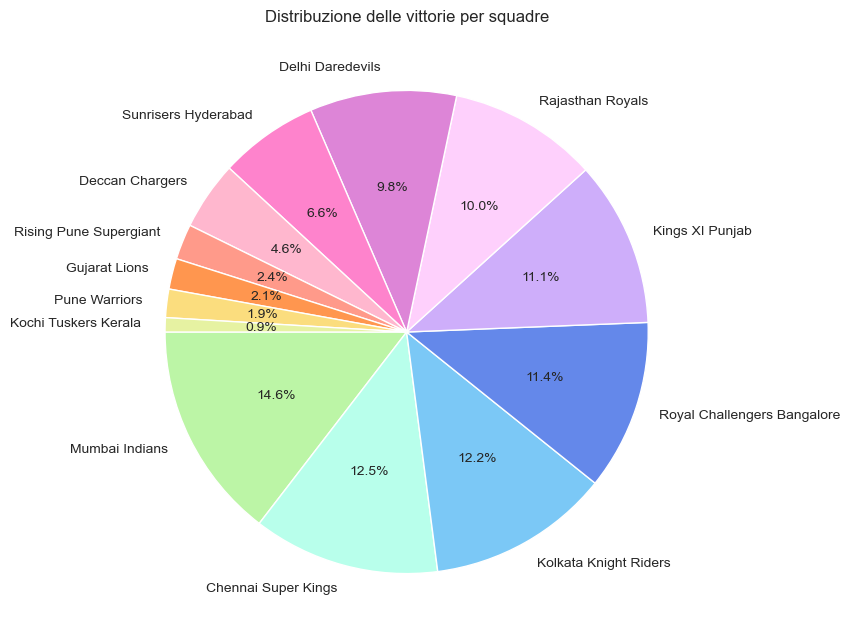

In [38]:
figure(figsize=(10,8), dpi=100)
labels=matches['winner'].value_counts().index.tolist()
sizes=matches['winner'].value_counts()
sns.set_style('darkgrid')
colors = ['#bcf5a6', '#b8ffeb', '#7bc8f6', '#6488ea', '#ceaefa', '#fed0fc', '#dd85d7', '#fe83cc', '#ffb7ce', '#ff9a8a', '#ff964f', '#fbdd7e', '#e6f2a2']
plt.title('Distribuzione delle vittorie per squadre')
plt.pie(sizes, labels=labels, colors=colors, autopct= '%1.1f%%', startangle=180)
plt.show()

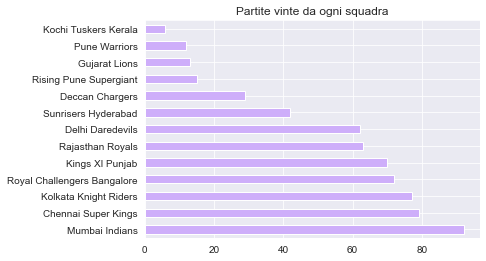

In [39]:
matches['winner'].value_counts().plot(kind='barh', color='#ceaefa', title='Partite vinte da ogni squadra')
plt.rcParams['figure.figsize'] = [8,10]
plt.show()

### Calcolo del numero effettivo di vincite per squadra

In [40]:
wins = matches['winner'].value_counts().reset_index()
wins

,index,winner
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,72
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


### Calcolo del numero di partite vinte rispetto a quelle perse

Text(0.5, 1.0, 'Confronto tra match vinti e giocati')

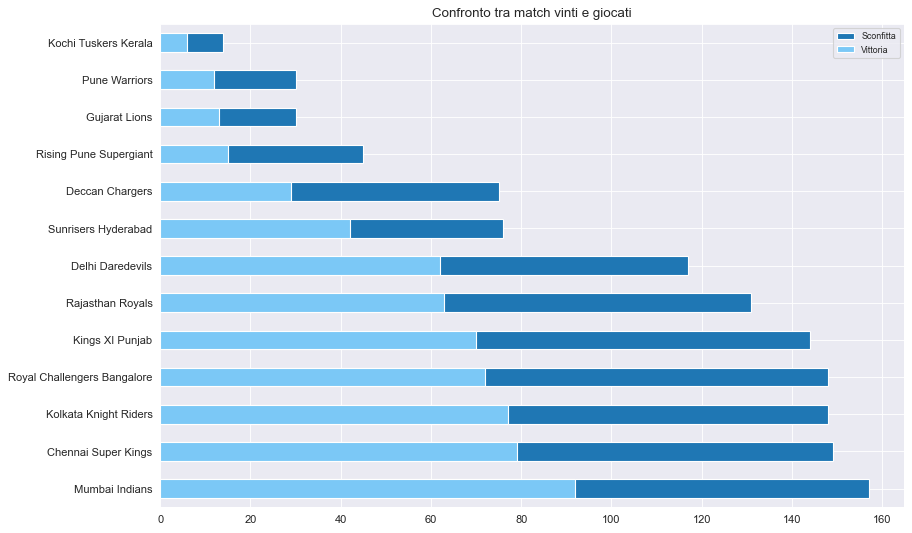

In [41]:
figure(figsize=(12, 8), dpi = 80)
x = matches['team1'].value_counts() 
y = matches['team2'].value_counts()
(x+y).sort_values(ascending = False).plot(kind='barh')
matches['winner'].value_counts().plot(kind='barh', color = '#7bc8f6')
plt.legend(labels = ["Sconfitta", "Vittoria"], loc='best', prop={'size':8})
plt.title('Confronto tra match vinti e giocati')

### Le variabili win_by_runs e win_by_wickets e la loro distribuzione

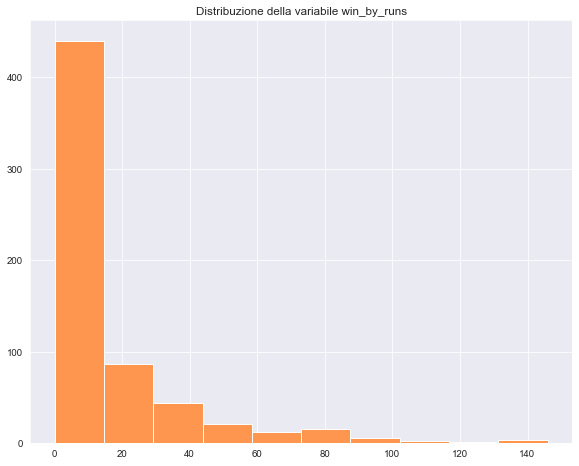

In [42]:
figure(figsize=(10,8), dpi=70)
plt.hist(matches['win_by_runs'], color = '#ff964f')
plt.title('Distribuzione della variabile win_by_runs')
plt.show()

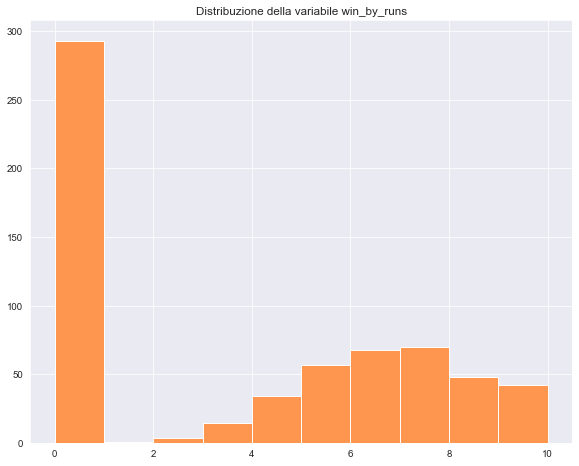

In [43]:
figure(figsize=(10,8), dpi=70)
plt.hist(matches['win_by_wickets'], color = '#ff964f')
plt.title('Distribuzione della variabile win_by_runs')
plt.show()

### Osservazione di win_by_wickets con la kernel density

In [44]:
import scipy.stats as sp
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import gmean, hmean

In [45]:
skewness = sp.skew(matches['win_by_runs'])
print("Il coefficiente di skewness è:", skewness) # so the distribution is skewd to the right since it's positive

Il coefficiente di skewness è: 2.507072573656323


In [46]:
skewness = sp.skew(matches['win_by_wickets'])
print("Il coefficiente di skewness è:", skewness)

Il coefficiente di skewness è: 0.2560081734764255


In [47]:
Kurtosis = sp.kurtosis(matches['win_by_runs'],fisher=True, nan_policy='omit')
print("Il coefficiente kurtosis è:", round(Kurtosis,2))

Il coefficiente kurtosis è: 7.33


In [48]:
Kurtosis = sp.kurtosis(matches['win_by_wickets'],fisher=True, nan_policy='omit')
print("Il coefficiente kurtosis è:", round(Kurtosis,2))

Il coefficiente kurtosis è: -1.53


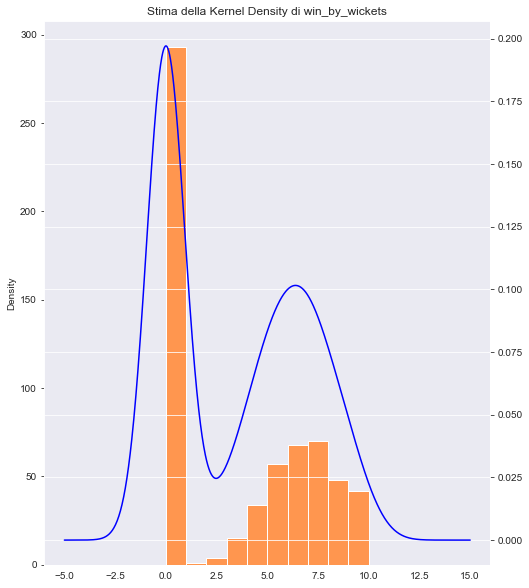

In [49]:
ax = matches["win_by_wickets"].plot(kind = "hist", color='#ff964f')
matches["win_by_wickets"].plot(color='blue', kind = "kde", ax = ax, secondary_y=True)
plt.title("Stima della Kernel Density di win_by_wickets")
plt.savefig("KDE_win_by_wickets")

### Visualizzazione con istogrammi delle diverse tipologie di runs

In [50]:
extra_runs = deliveries['extra_runs']

In [51]:
total_runs = deliveries['total_runs']

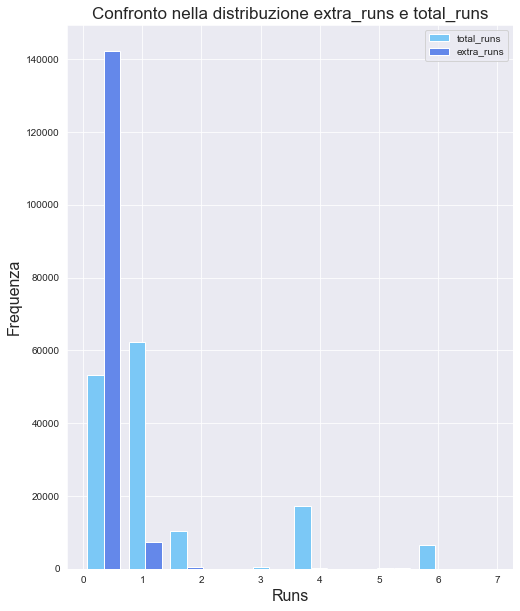

In [52]:
plt.hist([total_runs, extra_runs], color=['#7bc8f6', '#6488ea'])
plt.title("Confronto nella distribuzione extra_runs e total_runs", fontsize=17)
plt.xlabel("Runs", fontsize=16)
plt.ylabel("Frequenza",fontsize=16)
labels= ["total_runs","extra_runs"]
plt.legend(labels)
plt.show()

In [53]:
legbye_runs = deliveries['legbye_runs']

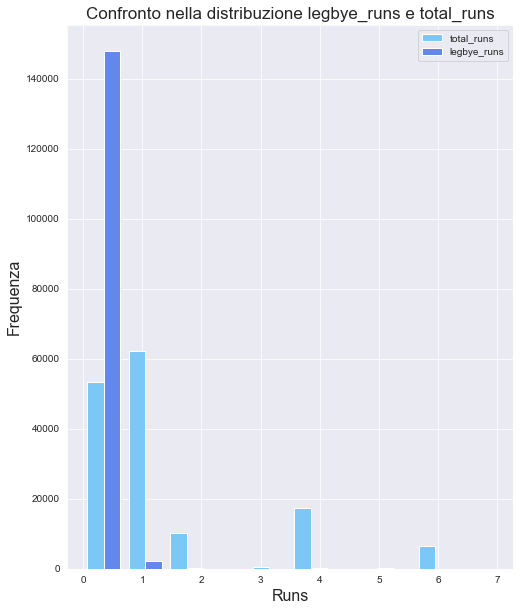

In [54]:
plt.hist([total_runs, legbye_runs], color=['#7bc8f6', '#6488ea'])
plt.title("Confronto nella distribuzione legbye_runs e total_runs", fontsize=17)
plt.xlabel("Runs", fontsize=16)
plt.ylabel("Frequenza",fontsize=16)
labels= ["total_runs","legbye_runs"]
plt.legend(labels)
plt.show()

In [55]:
wide_runs = deliveries['wide_runs']

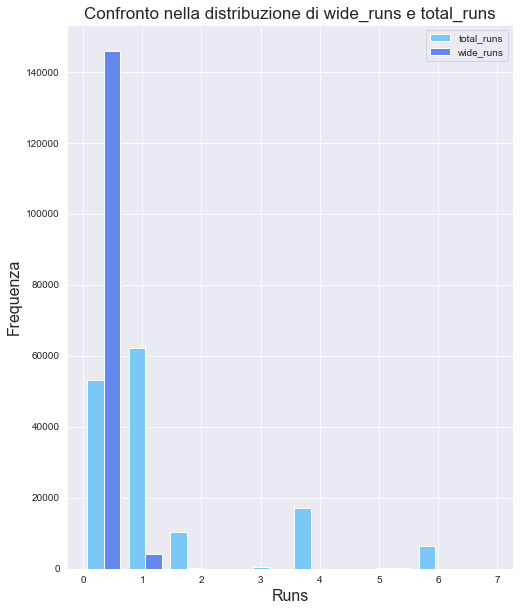

In [56]:
plt.hist([total_runs, wide_runs], color=['#7bc8f6', '#6488ea'])
plt.title("Confronto nella distribuzione di wide_runs e total_runs", fontsize=17)
plt.xlabel("Runs", fontsize=16)
plt.ylabel("Frequenza",fontsize=16)
labels= ["total_runs","wide_runs"]
plt.legend(labels)
plt.show()

In [57]:
noball_runs = deliveries['noball_runs']

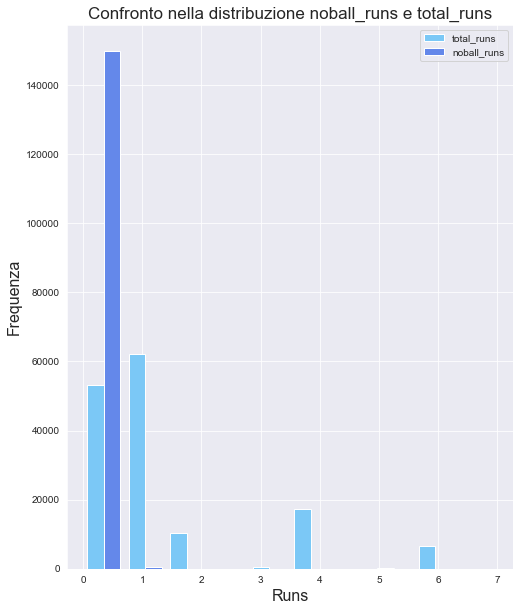

In [58]:
plt.hist([total_runs, noball_runs], color=['#7bc8f6', '#6488ea'])
plt.title("Confronto nella distribuzione noball_runs e total_runs", fontsize=17)
plt.xlabel("Runs", fontsize=16)
plt.ylabel("Frequenza",fontsize=16)
labels= ["total_runs","noball_runs"]
plt.legend(labels)
plt.show()

In [59]:
bye_runs = deliveries['bye_runs']

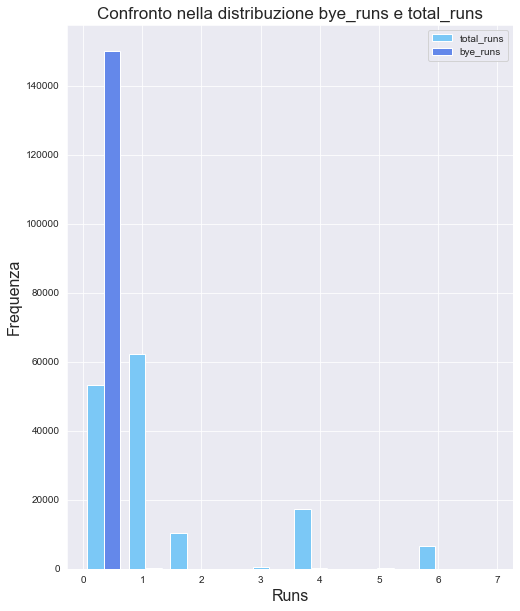

In [60]:
plt.hist([total_runs, bye_runs], color=['#7bc8f6', '#6488ea'])
plt.title("Confronto nella distribuzione bye_runs e total_runs", fontsize=17)
plt.xlabel("Runs", fontsize=16)
plt.ylabel("Frequenza",fontsize=16)
labels= ["total_runs","bye_runs"]
plt.legend(labels)
plt.show()

In [61]:
penalty_runs = deliveries['penalty_runs']

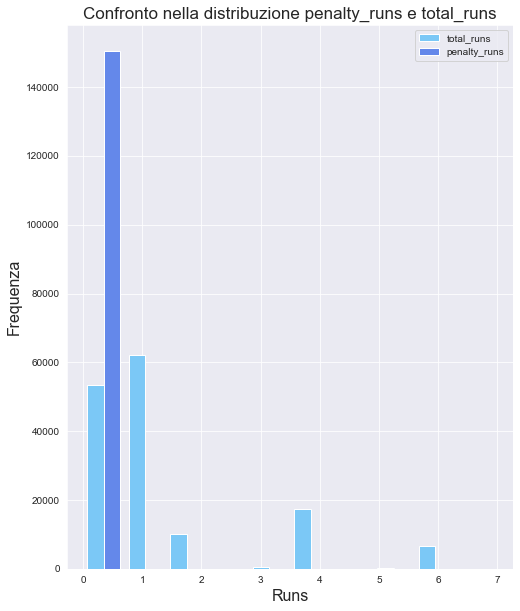

In [62]:
plt.hist([total_runs, penalty_runs], color=['#7bc8f6', '#6488ea'])
plt.title("Confronto nella distribuzione penalty_runs e total_runs", fontsize=17)
plt.xlabel("Runs", fontsize=16)
plt.ylabel("Frequenza",fontsize=16)
labels= ["total_runs","penalty_runs"]
plt.legend(labels)
plt.show()

In [63]:
batsman_runs = deliveries['batsman_runs']

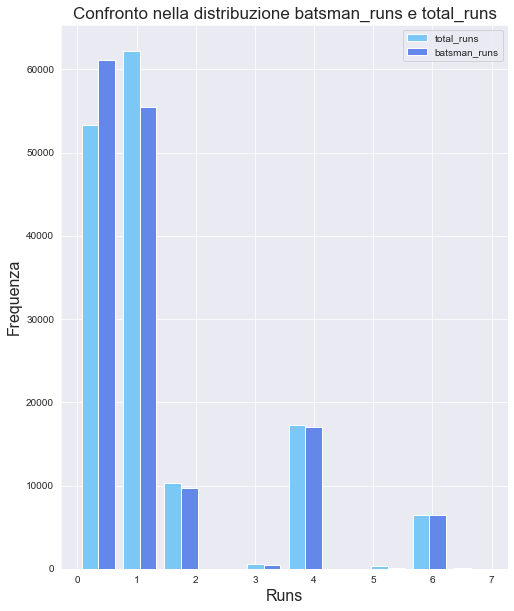

In [64]:
plt.hist([total_runs, batsman_runs], color=['#7bc8f6', '#6488ea'])
plt.title("Confronto nella distribuzione batsman_runs e total_runs", fontsize=17)
plt.xlabel("Runs", fontsize=16)
plt.ylabel("Frequenza",fontsize=16)
labels= ["total_runs","batsman_runs"]
plt.legend(labels)
plt.show()

### Calcolo del numero di partite giocate per ogni stagione

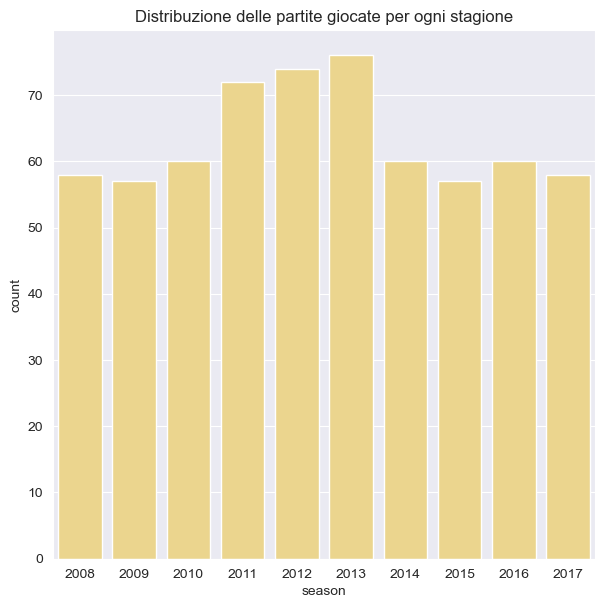

In [65]:
figure(figsize=(7,7), dpi=100) 
stagione = matches['season']
sns.countplot( x= stagione, color='#fbdd7e')
plt.title('Distribuzione delle partite giocate per ogni stagione')
plt.show()

### Calcolo delle vittorie per ogni squadra per stagione

<Figure size 1000x1200 with 0 Axes>

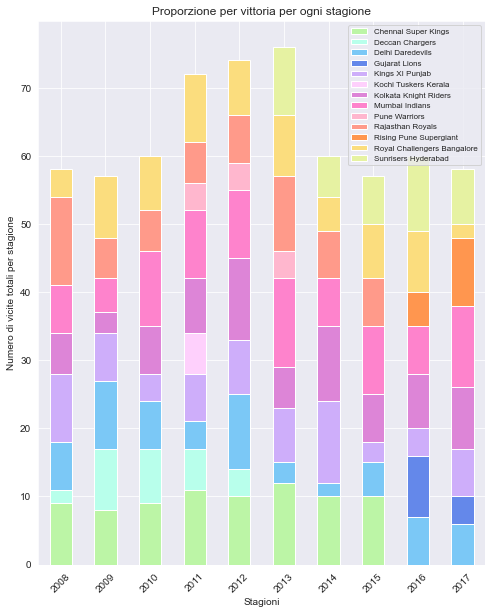

In [66]:
figure(figsize=(10,12), dpi=100)
colors = ['#bcf5a6', '#b8ffeb', '#7bc8f6', '#6488ea', '#ceaefa', '#fed0fc', '#dd85d7', '#fe83cc', '#ffb7ce', '#ff9a8a', '#ff964f', '#fbdd7e', '#e6f2a2']
vincite = matches.groupby(['season', 'winner'])['id'].count().unstack() #conteggio partite e vimcite per stagione
plot = vincite.plot(kind='bar', stacked=True, title="Proporzione per vittoria per ogni stagione", color=colors)
plot.set_xlabel("Stagioni")
plot.set_ylabel("Numero di vicite totali per stagione")
plt.xticks(rotation=45)
plot.legend(loc='best', prop={'size':8})

### Conteggio di valori true e false per la variabile dl_applied

In [67]:
prob_dl_applied = pd.crosstab(matches['season'], matches['dl_applied']) #applicazione della formula per stagione
prob_dl_applied 
#2008, 2011, 2016

dl_applied,False,True
season,,
2008,56,2
2009,54,3
2010,60,0
2011,69,3
2012,74,0
2013,76,0
2014,59,1
2015,55,2
2016,56,4


In [68]:
count_dl = matches['dl_applied'].value_counts()
count_dl

False    616
True      16
Name: dl_applied, dtype: int64

Verifica di un'eventuale correlazione tra periodo dell'anno e applicazione della Duckworth-Lewis formula

In [69]:
stagione2016 = matches[matches.season == 2016]

In [70]:
stagione2016dl = stagione2016[stagione2016.dl_applied == True]
stagione2016dl

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
597,598,2016,Hyderabad,2016-04-26,Sunrisers Hyderabad,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,True,Rising Pune Supergiant,34,0,AB Dinda,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,CK Nandan
620,621,2016,Kolkata,2016-05-14,Rising Pune Supergiant,Kolkata Knight Riders,Rising Pune Supergiant,bat,normal,True,Kolkata Knight Riders,0,8,YK Pathan,Eden Gardens,A Nand Kishore,BNJ Oxenford
624,625,2016,Visakhapatnam,2016-05-17,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,True,Rising Pune Supergiant,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin
625,626,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,True,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus


In [71]:
stagione2011 = matches[matches.season == 2011]

In [72]:
stagione2011dl = stagione2011[stagione2011.dl_applied == True]
stagione2011dl

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
251,252,2011,Kochi,2011-04-18,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,normal,True,Kochi Tuskers Kerala,0,7,BB McCullum,Nehru Stadium,K Hariharan,AL Hill
280,281,2011,Kolkata,2011-05-07,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,True,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel
290,291,2011,Bangalore,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,True,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin


In [73]:
stagione2009 = matches[matches.season == 2009]

In [74]:
stagione2009dl = stagione2009[stagione2009.dl_applied == True]
stagione2009dl

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,True,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,True,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade
148,149,2009,Centurion,2009-05-07,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,True,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene


## Visualizzazione delle distribuzioni delle variabili presenti in deliveries

### I 10 migliori giocatori

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'YK Pathan'),
  Text(2, 0, 'AB de Villiers'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'SK Raina'),
  Text(5, 0, 'RG Sharma'),
  Text(6, 0, 'MS Dhoni'),
  Text(7, 0, 'G Gambhir'),
  Text(8, 0, 'MEK Hussey'),
  Text(9, 0, 'AM Rahane')])

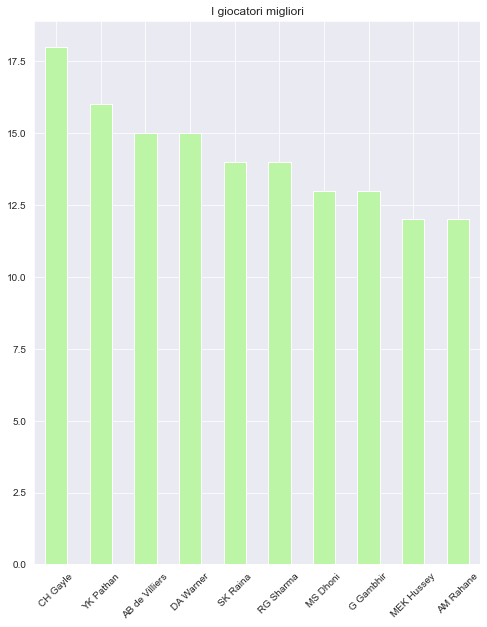

In [75]:
matches['player_of_match'].value_counts()[:10].plot(kind = 'bar', title="I giocatori migliori", color='#bcf5a6')
plt.xticks(rotation=45)

### Distribuzione dei risultati

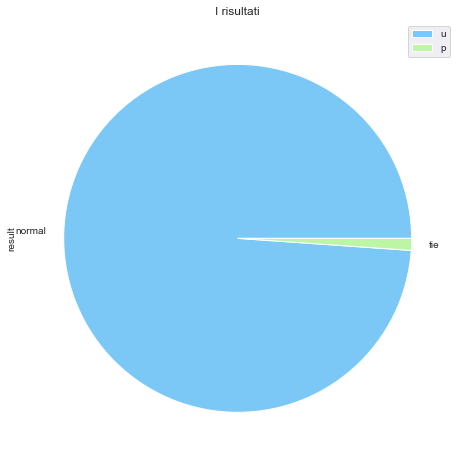

In [76]:
plt.figure(figsize = (12,8))
color = ['#7bc8f6', '#bcf5a6']
matches.result.value_counts().plot(kind='pie', colors=color, title="I risultati" ) #conteggio dei risutati normal e tie
plt.legend('upper right')

### Calcolo della probabilità di vittoria in base al lancio della moneta

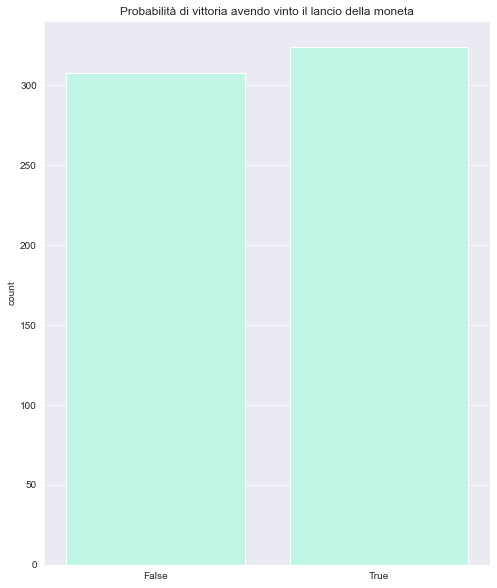

In [77]:
probabilita_vincita = matches['toss_winner'] == matches['winner'] #probabilità di vincita si ha quando il toss_winner equivale al winner
probabilita_vincita.groupby(probabilita_vincita).size()
sns.countplot(probabilita_vincita, color ='#b8ffeb' )
plt.title('Probabilità di vittoria avendo vinto il lancio della moneta')
plt.show()

In [78]:
prob_class = pd.crosstab(probabilita_vincita, matches['toss_decision']) #conteggio delle decisioni in base alla vincita della moneta
pc = prob_class.drop(0)
pc

toss_decision,bat,field
row_0,,
True,123,201


### Calcolo della probabilità di vittoria in base alla toss_decision

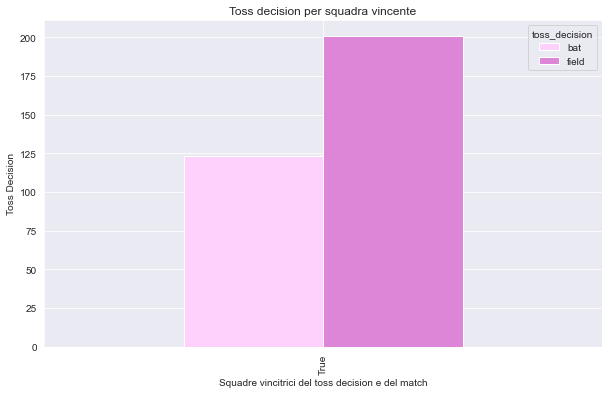

In [79]:
pc.plot(kind='bar', stacked=False, title='Toss decision per squadra vincente', color=['#fed0fc', '#dd85d7'], figsize=(10, 6))
plt.xlabel('Squadre vincitrici del toss decision e del match')
plt.ylabel('Toss Decision')
plt.show()

### Calcolo del numero di corse per battitore e la sua squadra di appartenenza

Text(0.5, 1.0, 'Numero di corse dei battitori e la loro squadra di appartenenza')

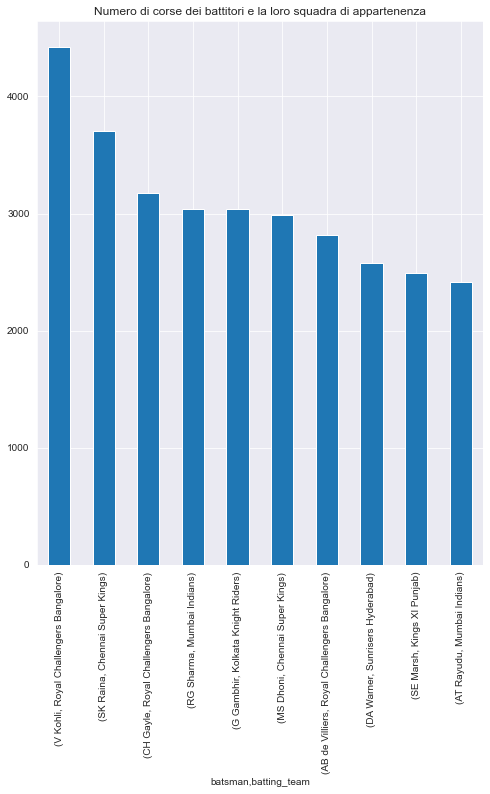

In [80]:
deliveries.groupby(['batsman','batting_team'])['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Numero di corse dei battitori e la loro squadra di appartenenza')

In [81]:
top_scores = deliveries.groupby([ "batsman","batting_team"])["batsman_runs"].sum().reset_index() #conteggio dei punti per battitore
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,batsman,batting_team,batsman_runs
735,V Kohli,Royal Challengers Bangalore,4423
656,SK Raina,Chennai Super Kings,3707
144,CH Gayle,Royal Challengers Bangalore,3175
577,RG Sharma,Mumbai Indians,3037
230,G Gambhir,Kolkata Knight Riders,3035
448,MS Dhoni,Chennai Super Kings,2986
40,AB de Villiers,Royal Challengers Bangalore,2815
171,DA Warner,Sunrisers Hyderabad,2579
654,SE Marsh,Kings XI Punjab,2489
87,AT Rayudu,Mumbai Indians,2416


### Unione di deliveries e matches per calcolare il numero di punti totali segnati per ogni stagione

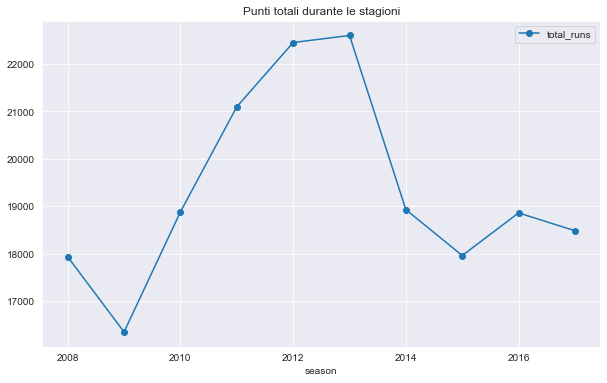

In [82]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#utilizzo di merge per creare un dataset comprendente il datset deliveries e due colonne del dataset matches
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Punti totali durante le stagioni')
plt.show()

In [83]:
skewness = sp.skew(deliveries['batsman_runs'])
print("Il coefficiente di skewness è:", skewness) # so the distribution is skewd to the right since it's positive

Il coefficiente di skewness è: 1.5965759193757214


In [84]:
skewness = sp.skew(deliveries['total_runs'])
print("Il coefficiente di skewness è:", skewness) # la distribuzione è inclinata sulla destra in quanto positiva

Il coefficiente di skewness è: 1.563843412237746


In [85]:
skewness = sp.skew(deliveries['wide_runs'])
print("Il coefficiente di skewness è:", skewness) # la distribuzione è pendente sulla destra in quanto positiva

Il coefficiente di skewness è: 11.680636598272578


In [86]:
skewness = sp.skew(deliveries['extra_runs'])
print("Il coefficiente di skewness è:", skewness)  # la distribuzione è pendente sulla destra in quanto positiva

Il coefficiente di skewness è: 8.165106410872307


In [87]:
skewness = sp.skew(deliveries['ball'])
print("Il coefficiente di skewness è:", skewness)  # la distribuzione è inclinata sulla destra in quanto positiva

Il coefficiente di skewness è: 0.09685639508448746


In [88]:
Kurtosis = sp.kurtosis(deliveries['batsman_runs'],fisher=True, nan_policy='omit')
print("Il coefficiente kurtosis è:", round(Kurtosis,3))

Il coefficiente kurtosis è: 1.695


In [89]:
Kurtosis = sp.kurtosis(deliveries['total_runs'],fisher=True, nan_policy='omit')
print("Il coefficiente kurtosis è:", round(Kurtosis,3))

Il coefficiente kurtosis è: 1.628


## Correlazione tra le variabili di deliveries

### Correlazione di Pearson

In [90]:
deliveries.corr(method='pearson')

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001033,0.004365,-0.002464,-0.001220,-0.004850,-0.004662,-0.004324,-0.005849,-0.000972,0.006273,-0.008833,0.004366
inning,0.001033,1.000000,-0.051496,-0.003618,0.091904,0.001055,-0.000395,-0.001385,0.000389,0.003763,-0.005668,0.000132,-0.005680
over,0.004365,-0.051496,1.000000,-0.010953,-0.037394,-0.016226,0.013669,-0.005907,0.015717,-0.001055,0.089945,-0.007649,0.088896
ball,-0.002464,-0.003618,-0.010953,1.000000,-0.001258,-0.005931,0.006755,-0.004449,0.002350,0.000774,0.008944,-0.004176,0.008086
is_super_over,-0.001220,0.091904,-0.037394,-0.001258,1.000000,-0.001155,0.001516,0.001717,0.014389,-0.000085,0.011497,0.003613,0.012377
wide_runs,-0.004850,0.001055,-0.016226,-0.005931,-0.001155,1.000000,-0.006230,-0.016186,-0.008703,0.013633,-0.111690,0.723726,0.047354
bye_runs,-0.004662,-0.000395,0.013669,0.006755,0.001516,-0.006230,1.000000,-0.004751,-0.002555,-0.000156,-0.032785,0.318850,0.037402
legbye_runs,-0.004324,-0.001385,-0.005907,-0.004449,0.001717,-0.016186,-0.004751,1.000000,-0.006637,-0.000405,-0.085177,0.557403,0.037322
noball_runs,-0.005849,0.000389,0.015717,0.002350,0.014389,-0.008703,-0.002555,-0.006637,1.000000,-0.000218,0.000272,0.196724,0.043722
penalty_runs,-0.000972,0.003763,-0.001055,0.000774,-0.000085,0.013633,-0.000156,-0.000405,-0.000218,1.000000,-0.002795,0.061842,0.010843


le variabili con correlazioni interessanti sono:
- 0.72 = wide_runs e extra_runs
- 0.97 = tota_runs e batman_runs

### Correlazione di Spearman

In [91]:
deliveries.corr(method='spearman')

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001126,0.004354,-0.002181,-0.001195,-0.006003,-0.007185,-0.005642,-0.006409,-0.000966,0.009163,-0.011267,0.005709
inning,0.001126,1.000000,-0.049011,-0.003647,0.046413,0.004258,-0.005069,-0.003051,-0.001815,0.003779,-0.008974,-0.000145,-0.009043
over,0.004354,-0.049011,1.000000,-0.010248,-0.038085,-0.016412,0.026811,-0.000525,0.016250,-0.001020,0.137518,-0.002050,0.136112
ball,-0.002181,-0.003647,-0.010248,1.000000,-0.001509,-0.006867,0.009539,-0.007148,0.002243,0.000826,0.011419,-0.006402,0.009387
is_super_over,-0.001195,0.046413,-0.038085,-0.001509,1.000000,-0.000782,0.004262,0.003522,0.016427,-0.000085,0.008711,0.006976,0.010388
wide_runs,-0.006003,0.004258,-0.016412,-0.006867,-0.000782,1.000000,-0.009279,-0.023436,-0.011372,0.010246,-0.193981,0.737107,0.060150
bye_runs,-0.007185,-0.005069,0.026811,0.009539,0.004262,-0.009279,1.000000,-0.006935,-0.003365,-0.000191,-0.057401,0.220761,0.030529
legbye_runs,-0.005642,-0.003051,-0.000525,-0.007148,0.003522,-0.023436,-0.006935,1.000000,-0.008499,-0.000483,-0.144974,0.551876,0.049134
noball_runs,-0.006409,-0.001815,0.016250,0.002243,0.016427,-0.011372,-0.003365,-0.008499,1.000000,-0.000234,-0.000559,0.266172,0.056681
penalty_runs,-0.000966,0.003779,-0.001020,0.000826,-0.000085,0.010246,-0.000191,-0.000483,-0.000234,1.000000,-0.003994,0.016051,0.006421


le variabili con correlazioni interessanti sono:
- 0.73 = wide_runs e extra_runs
- 0.93 = tota_runs e batman_runs

### Correlazione di Kendall

In [92]:
deliveries.corr("kendall")

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.000920,0.002976,-0.001564,-0.000976,-0.004897,-0.005869,-0.004605,-0.005237,-0.000789,0.006964,-0.009177,0.004316
inning,0.000920,1.000000,-0.041020,-0.003200,0.046400,0.004251,-0.005066,-0.003047,-0.001815,0.003778,-0.008339,-0.000145,-0.008388
over,0.002976,-0.041020,1.000000,-0.007538,-0.031868,-0.013712,0.022428,-0.000437,0.013596,-0.000854,0.108396,-0.001700,0.107047
ball,-0.001564,-0.003200,-0.007538,1.000000,-0.001325,-0.006019,0.008370,-0.006267,0.001968,0.000725,0.009302,-0.005604,0.007632
is_super_over,-0.000976,0.046400,-0.031868,-0.001325,1.000000,-0.000781,0.004261,0.003519,0.016427,-0.000085,0.008095,0.006956,0.009638
wide_runs,-0.004897,0.004251,-0.013712,-0.006019,-0.000781,1.000000,-0.009263,-0.023379,-0.011356,0.010232,-0.180032,0.736022,0.056051
bye_runs,-0.005869,-0.005066,0.022428,0.008370,0.004261,-0.009263,1.000000,-0.006926,-0.003364,-0.000191,-0.053330,0.220201,0.028337
legbye_runs,-0.004605,-0.003047,-0.000437,-0.006267,0.003519,-0.023379,-0.006926,1.000000,-0.008490,-0.000482,-0.134597,0.550865,0.045731
noball_runs,-0.005237,-0.001815,0.013596,0.001968,0.016427,-0.011356,-0.003364,-0.008490,1.000000,-0.000234,-0.000519,0.265429,0.052585
penalty_runs,-0.000789,0.003778,-0.000854,0.000725,-0.000085,0.010232,-0.000191,-0.000482,-0.000234,1.000000,-0.003712,0.016006,0.005957


le variabili con correlazioni interessanti sono:
- 0.73 = wide_runs e extra_runs
- 0.93 = tota_runs e batman_runs

### Heatmap delle variabili di deliveries

Text(0.5, 1.0, 'Correlazione tra le variabili del dataset deliveries')

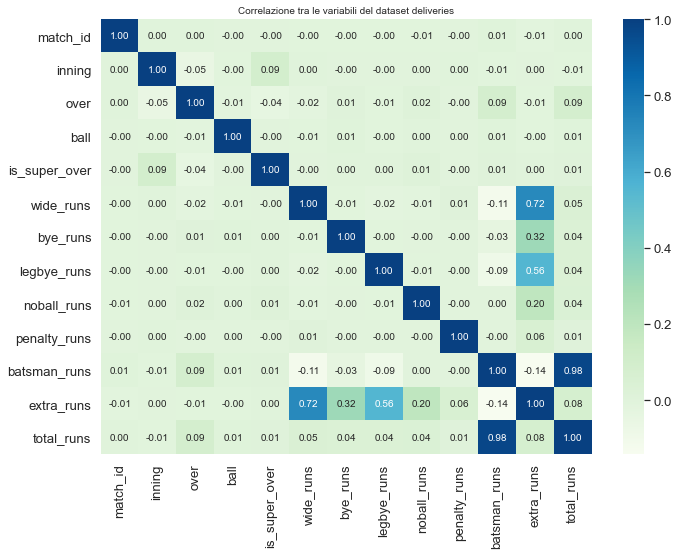

In [93]:
plt.rcParams['figure.figsize']=[11,8]
sns.set_context('notebook', font_scale=1.2, rc={"font.size":10, "axes.titlesize":10, "axes.lablesize":8})
sns.heatmap(deliveries.corr(), annot=True, fmt='.2f', cmap='GnBu')
plt.title('Correlazione tra le variabili del dataset deliveries')

## Correlazione tra le variabili di deliveries

### Correlazione di Spearman

In [94]:
matches.corr(method='spearman')

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.492064,0.024514,-0.005041,-0.015505
season,0.492064,1.000000,0.003968,-0.029951,0.002439
dl_applied,0.024514,0.003968,1.000000,0.013044,-0.011459
win_by_runs,-0.005041,-0.029951,0.013044,1.000000,-0.841321
win_by_wickets,-0.015505,0.002439,-0.011459,-0.841321,1.000000


le variabili con correlazioni interessanti sono:
- -0.84 = win_by_runs e win_by_wickets

### Correlazione di Pearson

In [95]:
matches.corr(method='pearson')

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.475741,0.024612,-0.007889,-0.014359
season,0.475741,1.000000,0.004926,-0.015867,0.003847
dl_applied,0.024612,0.004926,1.000000,-0.011325,-0.012684
win_by_runs,-0.007889,-0.015867,-0.011325,1.000000,-0.569980
win_by_wickets,-0.014359,0.003847,-0.012684,-0.569980,1.000000


le variabili con correlazioni interessanti sono:
- -0.56 = win_by_runs e win_by_wickets

### Correlazione di Kendall

In [96]:
matches.corr("kendall")

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.596781,0.020031,-0.003561,-0.011294
season,0.596781,1.000000,0.003400,-0.022892,0.001859
dl_applied,0.020031,0.003400,1.000000,0.011667,-0.010290
win_by_runs,-0.003561,-0.022892,0.011667,1.000000,-0.675762
win_by_wickets,-0.011294,0.001859,-0.010290,-0.675762,1.000000


le variabili con correlazioni interessanti sono:
- -0.67 = wide_runs e extra_runs


### Heatmap delle variabili di matches

Text(0.5, 1.0, 'Correlazione tra le variabili del dataset deliveries')

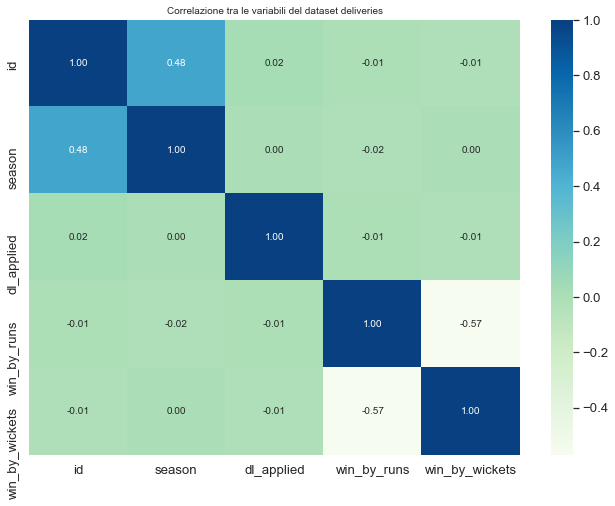

In [97]:
plt.rcParams['figure.figsize']=[11,8]
sns.set_context('notebook', font_scale=1.2, rc={"font.size":10, "axes.titlesize":10, "axes.lablesize":8})
sns.heatmap(matches.corr(), annot=True, fmt='.2f', cmap='GnBu')
plt.title('Correlazione tra le variabili del dataset deliveries')

### Pairplots tra le variabili dei datasets

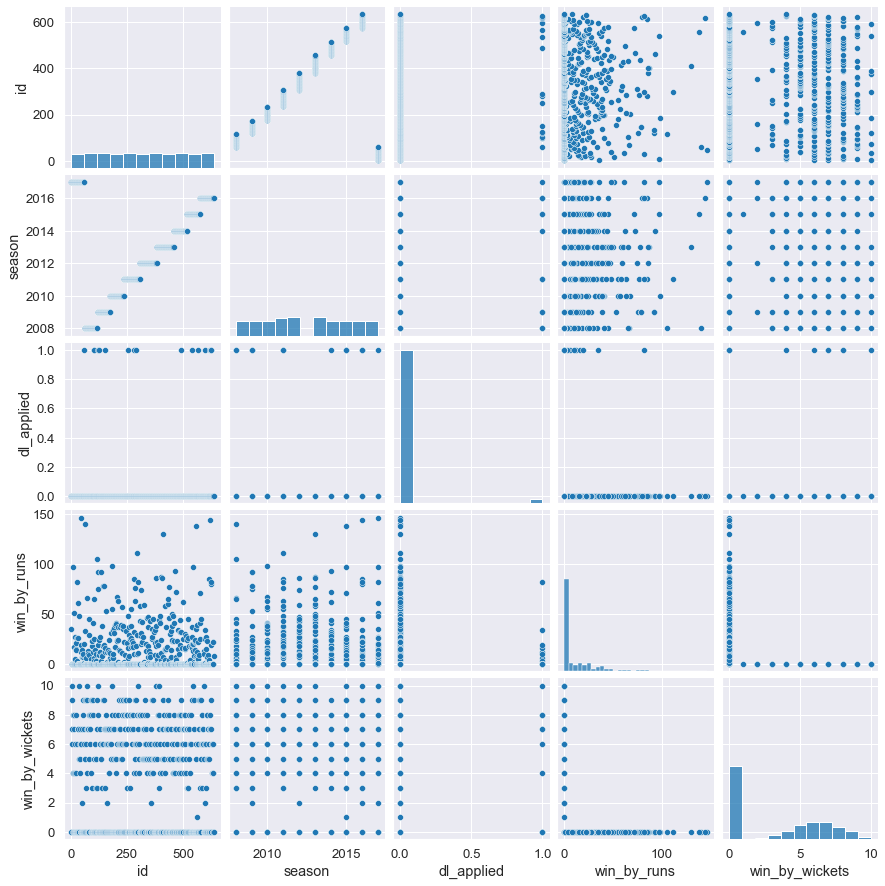

In [98]:
sns.pairplot(matches,  diag_kind='hist', palette= 'pastel')

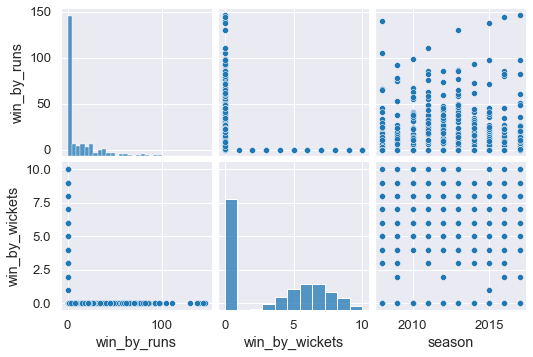

In [99]:
sns.pairplot(
    matches,
    x_vars=["win_by_runs", "win_by_wickets", "season"],
    y_vars=["win_by_runs", "win_by_wickets"],
)

### Regressione lineare tra coppie di variabili correlate

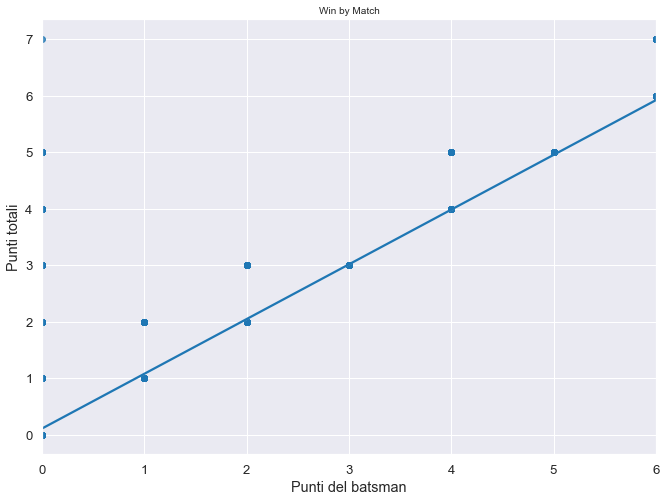

In [100]:
sns.regplot(x = 'batsman_runs', y = 'total_runs', fit_reg = True, data=deliveries)
plt.title("Win by Match")
plt.xlabel("Punti del batsman")
plt.ylabel("Punti totali")
plt.show()

Text(0.5, 1.0, 'Win by Match')

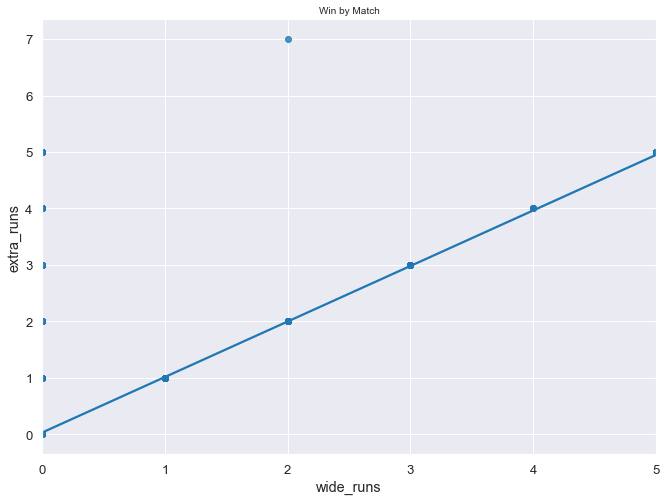

In [101]:
sns.regplot(x = 'wide_runs', y = 'extra_runs', fit_reg = True, data=deliveries)
plt.title("Win by Match")

### Scatterplot di alcune variabili correlate

Text(0.5, 1.0, 'Scatterplot delle variabili total_runs e batsman_runs')

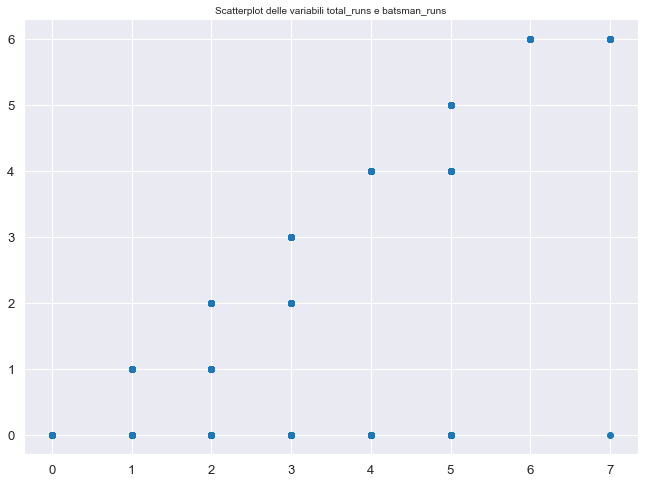

In [102]:
plt.scatter(x = 'total_runs', y = 'batsman_runs', cmap='GnBu', data=deliveries)
plt.title('Scatterplot delle variabili total_runs e batsman_runs')

Text(0.5, 1.0, 'Scatterplot delle variabiliwide_runs e extra_runs')

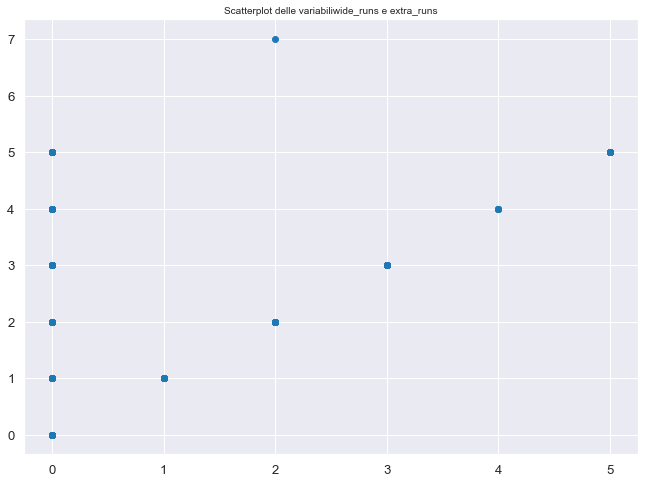

In [103]:
plt.scatter(x = 'wide_runs', y = 'extra_runs', cmap='GnBu', data=deliveries)
plt.title('Scatterplot delle variabiliwide_runs e extra_runs')

# Outlier detection di alcune variabili di matches

## Calcolo quartili ed estremi per le vairiabili di matches

In [104]:
Q1min_m = matches['win_by_wickets']. quantile(0.25, interpolation='linear')

In [105]:
Q1max_m = matches['win_by_wickets']. quantile(0.75, interpolation='linear')

In [106]:
Q2min_m = matches['win_by_runs']. quantile(0.25, interpolation='linear')

In [107]:
Q2max_m = matches['win_by_runs']. quantile(0.75, interpolation='linear')

In [108]:
Q3min_m = matches['player_of_match'].value_counts(). quantile(0.25, interpolation='linear')

In [109]:
Q3max_m = matches['player_of_match'].value_counts(). quantile(0.75, interpolation='linear')

## Quantili totali

In [110]:
Q1tot_m = Q1max_m - Q1min_m #win_by_wickets

In [111]:
Q2tot_m = Q2max_m - Q2min_m #win_by_runs

In [112]:
Q3tot_m = Q3max_m - Q3min_m

In [113]:
lowerfence1 = Q1min_m - 1.5*Q1tot_m
upperfence1 = Q1max_m + 1.5*Q1tot_m

In [114]:
lowerfence1

-10.5

In [115]:
upperfence1

17.5

In [116]:
lowerfence2 = Q2min_m - 1.5*Q2tot_m
upperfence2 = Q2max_m + 1.5*Q2tot_m

In [117]:
lowerfence2

-30.0

In [118]:
upperfence2

50.0

In [119]:
lowerfence3 = Q3min_m - 1.5*Q3tot_m
upperfence3 = Q3max_m + 1.5*Q3tot_m

In [120]:
lowerfence3

-3.5

In [121]:
upperfence3

8.5

In [122]:
OUTLIERS1_M = matches.loc[((matches['win_by_wickets']) < lowerfence1) | ((matches['win_by_wickets']) > upperfence1)]

In [123]:
OUTLIERS2_M = matches.loc[(matches['win_by_runs'] < lowerfence2) | (matches['win_by_runs'] > upperfence2)]


In [124]:
pmatch = matches['player_of_match'].value_counts().to_frame()
pmatch

,player_of_match
CH Gayle,18
YK Pathan,16
AB de Villiers,15
DA Warner,15
SK Raina,14
...,...
R Bhatia,1
MD Mishra,1
JJ Bumrah,1
BCJ Cutting,1


In [125]:
OUTLIERS3_M = pmatch.loc[(pmatch['player_of_match'] < lowerfence3) | (pmatch['player_of_match'] > upperfence3)]
OUTLIERS3_M                                               

,player_of_match
CH Gayle,18
YK Pathan,16
AB de Villiers,15
DA Warner,15
SK Raina,14
RG Sharma,14
MS Dhoni,13
G Gambhir,13
MEK Hussey,12
AM Rahane,12


In [126]:
OUTLIERS1_M

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [127]:
OUTLIERS2_M

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,False,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,False,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,False,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan
32,33,2017,Pune,2017-04-29,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,False,Rising Pune Supergiant,61,0,LH Ferguson,Maharashtra Cricket Association Stadium,KN Ananthapadmanabhan,M Erasmus
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,False,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,False,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
68,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,False,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba
100,101,2008,Jaipur,2008-05-17,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,False,Rajasthan Royals,65,0,GC Smith,Sawai Mansingh Stadium,BF Bowden,SL Shastri
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,False,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
118,119,2009,Cape Town,2009-04-18,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,False,Royal Challengers Bangalore,75,0,R Dravid,Newlands,BR Doctrove,RB Tiffin


In [128]:
NORMAL1 = matches.loc[(matches['win_by_runs'] > lowerfence1)  & (matches['win_by_runs'] < upperfence1) ]

In [129]:
NORMAL2 = matches.loc[(matches['win_by_wickets'] > lowerfence2)  & (matches['win_by_wickets'] < upperfence2) ]

In [130]:
NORMAL3 = pmatch.loc[(pmatch['player_of_match'] > lowerfence3) & (pmatch['player_of_match'] < upperfence3)]
NORMAL3

,player_of_match
SR Tendulkar,8
RV Uthappa,7
RA Jadeja,7
AT Rayudu,7
AC Gilchrist,7
...,...
R Bhatia,1
MD Mishra,1
JJ Bumrah,1
BCJ Cutting,1


In [131]:
matches.describe().unstack()

id              count     632.000000
                mean      318.264241
                std       183.400261
                min         1.000000
                25%       159.750000
                50%       318.500000
                75%       476.250000
                max       636.000000
season          count     632.000000
                mean     2012.477848
                std         2.771742
                min      2008.000000
                25%      2010.000000
                50%      2012.000000
                75%      2015.000000
                max      2017.000000
win_by_runs     count     632.000000
                mean       13.745253
                std        23.965836
                min         0.000000
                25%         0.000000
                50%         0.000000
                75%        20.000000
                max       146.000000
win_by_wickets  count     632.000000
                mean        3.393987
                std         3.420572
 

In [132]:
NORMAL1.describe().unstack()

id              count     457.000000
                mean      315.877462
                std       187.107326
                min         2.000000
                25%       152.000000
                50%       321.000000
                75%       480.000000
                max       636.000000
season          count     457.000000
                mean     2012.509847
                std         2.844742
                min      2008.000000
                25%      2010.000000
                50%      2013.000000
                75%      2015.000000
                max      2017.000000
win_by_runs     count     457.000000
                mean        2.166302
                std         4.507635
                min         0.000000
                25%         0.000000
                50%         0.000000
                75%         0.000000
                max        17.000000
win_by_wickets  count     457.000000
                mean        4.693654
                std         3.174429
 

### Boxplots degli outliers di matches

Text(0, 0.5, 'Counts')

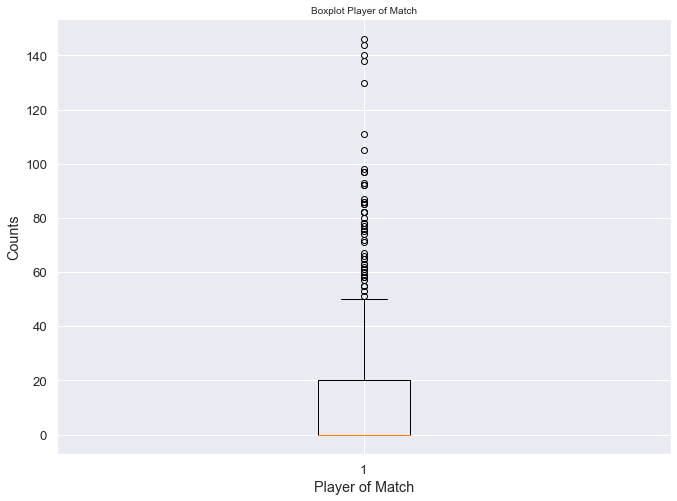

In [133]:
plt.boxplot(matches.win_by_runs)
plt.title("Boxplot Player of Match")
plt.xlabel('Player of Match')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

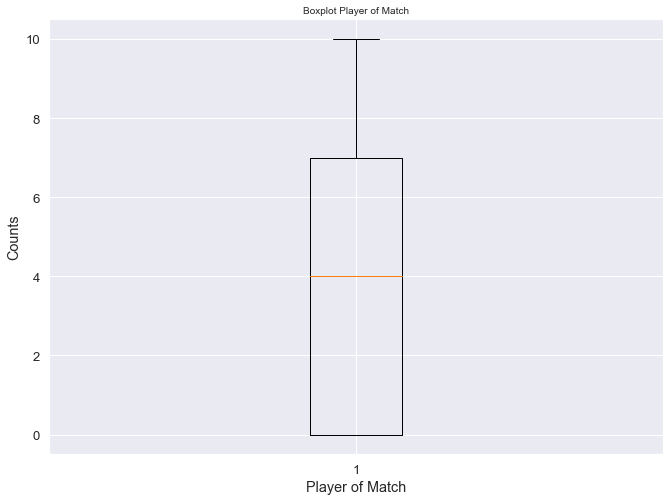

In [134]:
plt.boxplot(matches.win_by_wickets)
plt.title("Boxplot Player of Match")
plt.xlabel('Player of Match')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

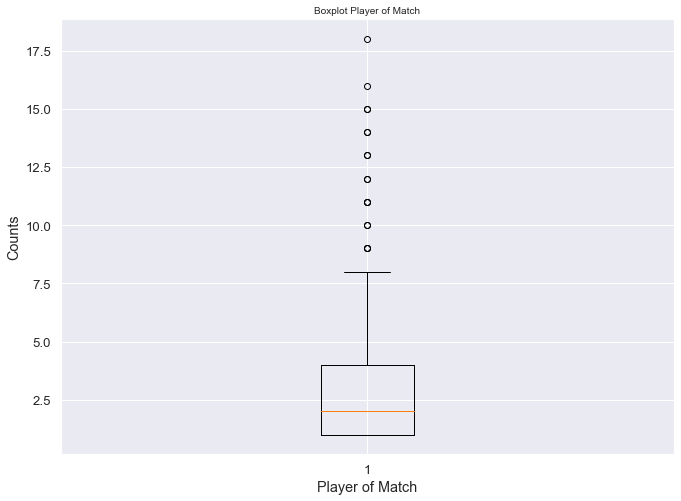

In [135]:
plt.boxplot(matches.player_of_match.value_counts())
plt.title("Boxplot Player of Match")
plt.xlabel('Player of Match')
plt.ylabel('Counts')

# Outliers Detection per il dataset deliveries

## Calcolo quartili ed estremi per le variabili deliveries  

In [136]:
Q1min_d = deliveries['over'].quantile(0.25, interpolation='linear')

In [137]:
Q1max_d = deliveries['over'].quantile(0.75, interpolation='linear')

In [138]:
Q2min_d = deliveries['ball'].quantile(0.25, interpolation='linear')

In [139]:
Q2max_d = deliveries['ball'].quantile(0.75, interpolation='linear')

In [140]:
Q3min_d = deliveries['wide_runs'].quantile(0.25, interpolation='linear')

In [141]:
Q3max_d = deliveries['wide_runs'].quantile(0.75, interpolation='linear')

In [142]:
Q4min_d = deliveries['bye_runs'].quantile(0.25, interpolation='linear')

In [143]:
Q4max_d = deliveries['bye_runs'].quantile(0.75, interpolation='linear')

In [144]:
Q5min_d = deliveries['legbye_runs'].quantile(0.25, interpolation='linear')

In [145]:
Q5max_d = deliveries['legbye_runs'].quantile(0.75, interpolation='linear')

In [146]:
Q6min_d = deliveries['noball_runs'].quantile(0.25, interpolation='linear')

In [147]:
Q6max_d = deliveries['noball_runs'].quantile(0.75, interpolation='linear')

In [148]:
Q7min_d = deliveries['penalty_runs'].quantile(0.25, interpolation='linear')

In [149]:
Q7max_d = deliveries['penalty_runs'].quantile(0.75, interpolation='linear')

In [150]:
Q8min_d = deliveries['batsman_runs'].quantile(0.25, interpolation='linear')

In [151]:
Q8max_d = deliveries['batsman_runs'].quantile(0.75, interpolation='linear')

In [152]:
Q9min_d = deliveries['extra_runs'].quantile(0.25, interpolation='linear') 

In [153]:
Q9max_d = deliveries['extra_runs'].quantile(0.75, interpolation='linear')

In [154]:
Q10min_d = deliveries['total_runs'].quantile(0.25, interpolation='linear') 

In [155]:
Q10max_d = deliveries['total_runs'].quantile(0.75, interpolation='linear') 

In [156]:
Q1tot_d = Q1max_d - Q1min_d #over

In [157]:
Q2tot_d = Q2max_d - Q2min_d #ball

In [158]:
Q3tot_d = Q3max_d - Q3min_d #wide_runs

In [159]:
Q4tot_d = Q4max_d - Q4min_d #bye_runs

In [160]:
Q5tot_d = Q5max_d - Q5min_d #legbye_runs

In [161]:
Q6tot_d = Q6max_d - Q6min_d #noball_runs

In [162]:
Q7tot_d = Q7max_d - Q7min_d #penalty_runs

In [163]:
Q8tot_d = Q8max_d - Q8min_d #batsman_runs

In [164]:
Q9tot_d = Q9max_d - Q9min_d #extra_runs

In [165]:
Q10tot_d = Q10max_d - Q10min_d #total_runs

In [166]:
Lowerfence1_d = Q1min_d - 1.5*Q1tot_d
Upperfence1_d = Q1max_d + 1.5*Q1tot_d

In [167]:
Lowerfence1_d 

-10.0

In [168]:
Upperfence1_d

30.0

In [169]:
Lowerfence2_d = Q2min_d - 1.5*Q2tot_d
Upperfence2_d = Q2max_d + 1.5*Q2tot_d

In [170]:
Lowerfence2_d

-2.5

In [171]:
Upperfence2_d

9.5

In [172]:
Lowerfence3_d = Q3min_d - 1.5*Q3tot_d
Upperfence3_d = Q3max_d + 1.5*Q3tot_d

In [173]:
Lowerfence3_d

0.0

In [174]:
Upperfence3_d

0.0

In [175]:
Lowerfence4_d = Q4min_d - 1.5*Q4tot_d
Upperfence4_d = Q4max_d + 1.5*Q4tot_d

In [176]:
Lowerfence4_d

0.0

In [177]:
Upperfence4_d

0.0

In [178]:
Lowerfence5_d = Q5min_d - 1.5*Q5tot_d
Upperfence5_d = Q5max_d + 1.5*Q5tot_d

In [179]:
Lowerfence5_d

0.0

In [180]:
Upperfence5_d

0.0

In [181]:
Lowerfence6_d = Q6min_d - 1.5*Q6tot_d
Upperfence6_d = Q6max_d + 1.5*Q6tot_d

In [182]:
Lowerfence6_d

0.0

In [183]:
Lowerfence6_d

0.0

In [184]:
Lowerfence7_d = Q7min_d - 1.5*Q7tot_d
Upperfence7_d = Q7max_d + 1.5*Q7tot_d

In [185]:
Lowerfence7_d

0.0

In [186]:
Lowerfence7_d

0.0

In [187]:
Lowerfence8_d = Q8min_d - 1.5*Q8tot_d
Upperfence8_d = Q8max_d + 1.5*Q8tot_d

In [188]:
Lowerfence8_d

-1.5

In [189]:
Upperfence8_d

2.5

In [190]:
Lowerfence9_d = Q9min_d - 1.5*Q9tot_d
Upperfence9_d = Q9max_d + 1.5*Q9tot_d

In [191]:
Lowerfence9_d

0.0

In [192]:
Upperfence9_d

0.0

In [193]:
Lowerfence10_d = Q10min_d - 1.5*Q10tot_d
Upperfence10_d = Q10max_d + 1.5*Q10tot_d

In [194]:
Lowerfence10_d

-1.5

In [195]:
Upperfence10_d

2.5

In [196]:
OUTLIERS1_d = deliveries.loc[(deliveries['over'] < Lowerfence1_d)  |  (deliveries['over'] > Upperfence1_d)]

In [197]:
OUTLIERS2_d = deliveries.loc[(deliveries['ball'] < Lowerfence2_d)  |  (deliveries['ball'] > Upperfence2_d)]

In [198]:
OUTLIERS3_d = deliveries.loc[(deliveries['wide_runs'] < Lowerfence3_d)  |  (deliveries['wide_runs'] > Upperfence3_d)]

In [199]:
OUTLIERS4_d = deliveries.loc[(deliveries['bye_runs'] < Lowerfence4_d)  |  (deliveries['bye_runs'] > Upperfence4_d)]

In [200]:
OUTLIERS5_d = deliveries.loc[(deliveries['legbye_runs'] < Lowerfence5_d)  |  (deliveries['legbye_runs'] > Upperfence5_d)]

In [201]:
OUTLIERS6_d = deliveries.loc[(deliveries['noball_runs'] < Lowerfence6_d)  |  (deliveries['noball_runs'] > Upperfence6_d)]

In [202]:
OUTLIERS7_d = deliveries.loc[(deliveries['penalty_runs'] < Lowerfence7_d)  |  (deliveries['penalty_runs'] > Upperfence7_d)]

In [203]:
OUTLIERS8_d = deliveries.loc[(deliveries['batsman_runs'] < Lowerfence8_d)  |  (deliveries['batsman_runs'] > Upperfence8_d)]

In [204]:
OUTLIERS9_d = deliveries.loc[(deliveries['extra_runs'] < Lowerfence9_d)  |  (deliveries['extra_runs'] > Upperfence9_d)]

In [205]:
OUTLIERS10_d = deliveries.loc[(deliveries['total_runs'] < Lowerfence10_d)  |  (deliveries['total_runs'] > Upperfence10_d)]

In [206]:
OUTLIERS1_d # over 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs


In [207]:
OUTLIERS2_d #ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs


In [208]:
OUTLIERS3_d #wide_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
78,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,5,Yuvraj Singh,MC Henriques,A Choudhary,0,1,0,0,0,0,0,1,1
107,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,3,Yuvraj Singh,DJ Hooda,A Choudhary,0,1,0,0,0,0,0,1,1
108,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,4,Yuvraj Singh,DJ Hooda,A Choudhary,0,1,0,0,0,0,0,1,1
146,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,4,CH Gayle,Mandeep Singh,B Kumar,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150327,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,5,BCJ Cutting,B Kumar,CJ Jordan,0,5,0,0,0,0,0,5,5
150342,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,V Kohli,BB Sran,0,1,0,0,0,0,0,1,1
150346,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,5,CH Gayle,V Kohli,BB Sran,0,1,0,0,0,0,0,1,1
150352,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,3,V Kohli,CH Gayle,B Kumar,0,1,0,0,0,0,0,1,1


In [209]:
OUTLIERS4_d #bye_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
372,2,1,Mumbai Indians,Rising Pune Supergiant,20,7,HH Pandya,MJ McClenaghan,AB Dinda,0,0,1,0,0,0,0,1,1
650,3,2,Kolkata Knight Riders,Gujarat Lions,6,2,G Gambhir,CA Lynn,S Kaushik,0,0,4,0,0,0,0,4,4
1323,6,1,Gujarat Lions,Sunrisers Hyderabad,20,2,Basil Thampi,P Kumar,B Kumar,0,0,1,0,0,0,0,1,1
2667,12,1,Royal Challengers Bangalore,Mumbai Indians,13,5,AB de Villiers,V Kohli,KH Pandya,0,0,4,0,0,0,0,4,4
3197,14,2,Sunrisers Hyderabad,Kolkata Knight Riders,1,4,DA Warner,S Dhawan,UT Yadav,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147414,623,2,Delhi Daredevils,Mumbai Indians,16,4,S Nadeem,CH Morris,JJ Bumrah,0,0,1,0,0,0,0,1,1
148376,628,1,Sunrisers Hyderabad,Delhi Daredevils,18,6,NV Ojha,B Kumar,NM Coulter-Nile,0,0,1,0,0,0,0,1,1
149221,631,2,Sunrisers Hyderabad,Kolkata Knight Riders,16,7,KV Sharma,MC Henriques,Kuldeep Yadav,0,0,1,0,0,0,0,1,1
149847,634,1,Sunrisers Hyderabad,Kolkata Knight Riders,20,6,Bipul Sharma,BB Sran,M Morkel,0,0,1,0,0,0,0,1,1


In [210]:
OUTLIERS5_d #legbye_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1
238,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,1,TS Mills,YS Chahal,B Kumar,0,0,0,1,0,0,0,1,1
309,2,1,Mumbai Indians,Rising Pune Supergiant,11,1,AT Rayudu,N Rana,A Zampa,0,0,0,1,0,0,0,1,1
383,2,2,Rising Pune Supergiant,Mumbai Indians,2,4,MA Agarwal,AM Rahane,HH Pandya,0,0,0,1,0,0,0,1,1
540,3,1,Gujarat Lions,Kolkata Knight Riders,8,3,BB McCullum,SK Raina,CR Woakes,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150337,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,CH Gayle,V Kohli,B Kumar,0,0,0,1,0,0,0,1,1
150351,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,2,CH Gayle,V Kohli,B Kumar,0,0,0,1,0,0,0,1,1
150446,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,5,STR Binny,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1
150451,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,4,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,0,0,1,0,0,0,1,1


In [211]:
OUTLIERS6_d #noball_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1
182,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,1,KM Jadhav,TM Head,MC Henriques,0,0,0,0,1,0,1,1,2
1440,7,1,Kolkata Knight Riders,Mumbai Indians,3,3,CA Lynn,G Gambhir,JJ Bumrah,0,0,0,0,1,0,1,1,2
1443,7,1,Kolkata Knight Riders,Mumbai Indians,3,6,CA Lynn,G Gambhir,JJ Bumrah,0,0,0,0,1,0,1,1,2
1545,7,1,Kolkata Knight Riders,Mumbai Indians,20,2,MK Pandey,SP Narine,MJ McClenaghan,0,0,0,0,1,0,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147945,626,1,Royal Challengers Bangalore,Kings XI Punjab,12,7,V Kohli,KL Rahul,KJ Abbott,0,0,0,0,1,0,1,1,2
148832,630,1,Mumbai Indians,Gujarat Lions,12,1,N Rana,JC Buttler,DR Smith,0,0,0,0,1,0,4,1,5
149176,631,2,Sunrisers Hyderabad,Kolkata Knight Riders,9,5,S Dhawan,NV Ojha,JO Holder,0,0,0,0,1,0,0,1,1
149261,632,1,Delhi Daredevils,Royal Challengers Bangalore,3,1,Q de Kock,KK Nair,CJ Jordan,0,0,0,0,1,0,1,1,2


In [212]:
OUTLIERS7_d #penalty_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
15476,66,2,Delhi Daredevils,Deccan Chargers,12,6,V Sehwag,S Dhawan,PP Ojha,0,0,0,0,0,5,0,5,5
112093,473,2,Delhi Daredevils,Mumbai Indians,5,2,M Vijay,Q de Kock,SL Malinga,0,2,0,0,0,5,0,7,7


In [213]:
OUTLIERS8_d  #batsman_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,6,0,6
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4
17,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,4,MC Henriques,S Dhawan,TS Mills,0,0,0,0,0,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150428,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,15,5,SR Watson,KL Rahul,MC Henriques,0,0,0,0,0,0,6,0,6
150440,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,0,0,0,0,0,6,0,6
150447,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,6,Sachin Baby,STR Binny,B Kumar,0,0,0,0,0,0,4,0,4
150453,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,Sachin Baby,CJ Jordan,Mustafizur Rahman,0,0,0,0,0,0,6,0,6


In [214]:
OUTLIERS9_d #extra runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1
78,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,5,Yuvraj Singh,MC Henriques,A Choudhary,0,1,0,0,0,0,0,1,1
107,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,3,Yuvraj Singh,DJ Hooda,A Choudhary,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150352,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,3,V Kohli,CH Gayle,B Kumar,0,1,0,0,0,0,0,1,1
150383,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,8,3,CH Gayle,V Kohli,BCJ Cutting,0,1,0,0,0,0,0,1,1
150446,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,5,STR Binny,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1
150451,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,4,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,0,0,1,0,0,0,1,1


In [215]:
OUTLIERS10_d #total runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,6,0,6
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4
17,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,4,MC Henriques,S Dhawan,TS Mills,0,0,0,0,0,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150428,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,15,5,SR Watson,KL Rahul,MC Henriques,0,0,0,0,0,0,6,0,6
150440,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,0,0,0,0,0,6,0,6
150447,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,6,Sachin Baby,STR Binny,B Kumar,0,0,0,0,0,0,4,0,4
150453,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,Sachin Baby,CJ Jordan,Mustafizur Rahman,0,0,0,0,0,0,6,0,6


## Calcolo dei valori inliers (normali) delle variabili di deliveries

In [216]:
NORMAL1_d = deliveries.loc[(deliveries['over'] > Lowerfence1_d)  & (deliveries['over'] < Upperfence1_d) ]

In [217]:
NORMAL2_d = deliveries.loc[(deliveries['ball'] > Lowerfence2_d)  & (deliveries['ball'] < Upperfence2_d) ]

In [218]:
NORMAL3_d = deliveries.loc[(deliveries['wide_runs'] > Lowerfence3_d)  & (deliveries['wide_runs'] < Upperfence3_d) ]

In [219]:
NORMAL4_d = deliveries.loc[(deliveries['bye_runs'] > Lowerfence4_d)  & (deliveries['bye_runs'] < Upperfence4_d) ]

In [220]:
NORMAL5_d = deliveries.loc[(deliveries['legbye_runs'] > Lowerfence5_d)  & (deliveries['legbye_runs'] < Upperfence5_d) ]

In [221]:
NORMAL6_d = deliveries.loc[(deliveries['noball_runs'] > Lowerfence6_d)  & (deliveries['noball_runs'] < Upperfence6_d) ]

In [222]:
NORMAL7_d = deliveries.loc[(deliveries['penalty_runs'] > Lowerfence7_d)  & (deliveries['penalty_runs'] < Upperfence7_d) ]

In [223]:
NORMAL8_d = deliveries.loc[(deliveries['batsman_runs'] > Lowerfence8_d)  & (deliveries['batsman_runs'] < Upperfence8_d) ]

In [224]:
NORMAL9_d = deliveries.loc[(deliveries['extra_runs'] > Lowerfence9_d)  & (deliveries['extra_runs'] < Upperfence9_d) ]

In [225]:
NORMAL10_d = deliveries.loc[(deliveries['total_runs'] > Lowerfence10_d)  & (deliveries['total_runs'] < Upperfence10_d) ]

In [226]:
deliveries.describe().unstack()

match_id    count    150460.000000
            mean        318.281317
            std         182.955531
            min           1.000000
            25%         161.000000
                         ...      
total_runs  min           0.000000
            25%           0.000000
            50%           1.000000
            75%           1.000000
            max           7.000000
Length: 104, dtype: float64

In [227]:
NORMAL1_d.describe().unstack()

match_id    count    150460.000000
            mean        318.281317
            std         182.955531
            min           1.000000
            25%         161.000000
                         ...      
total_runs  min           0.000000
            25%           0.000000
            50%           1.000000
            75%           1.000000
            max           7.000000
Length: 104, dtype: float64

## Visualizzazione tramite Boxplot delle variabili di deliveries 

Text(0.5, 1.0, 'Boxplot variabile over')

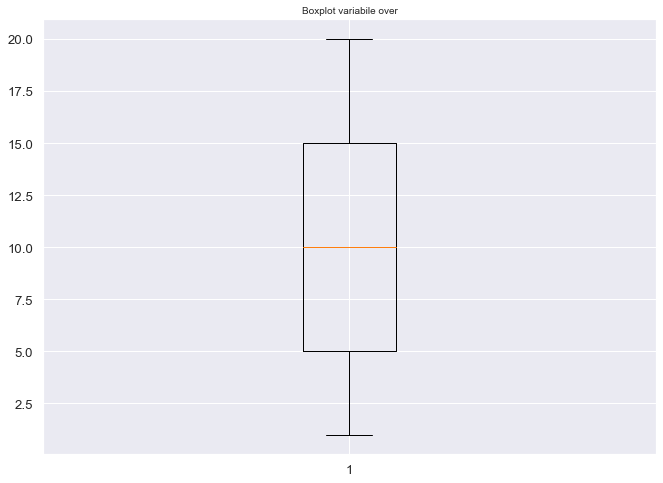

In [228]:
plt.boxplot(deliveries['over'])
plt.title('Boxplot variabile over')

Text(0.5, 1.0, 'Boxplot variabile ball')

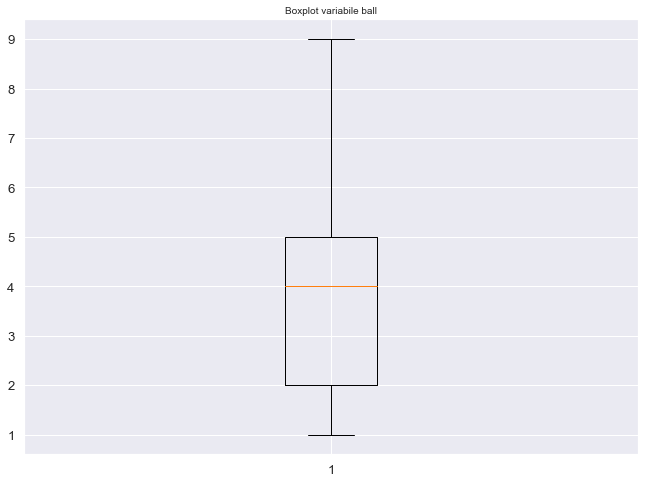

In [229]:
plt.boxplot(deliveries['ball'])
plt.title('Boxplot variabile ball')

Text(0.5, 1.0, 'Boxplot variabile wide_runs')

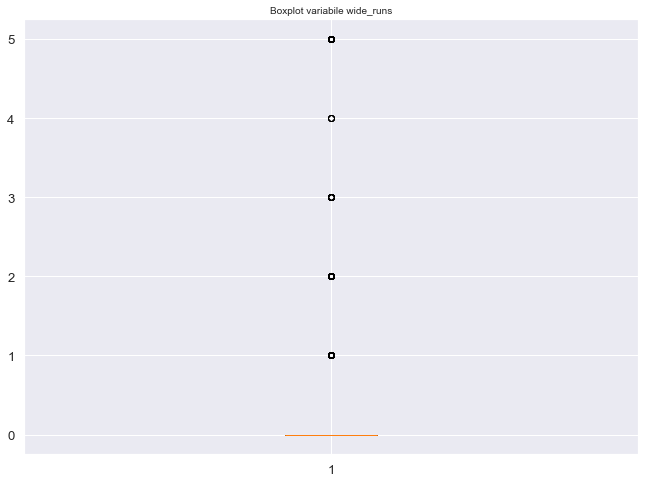

In [230]:
plt.boxplot(deliveries['wide_runs'])
plt.title('Boxplot variabile wide_runs')

Text(0.5, 1.0, 'Boxplot variabile bye_runs')

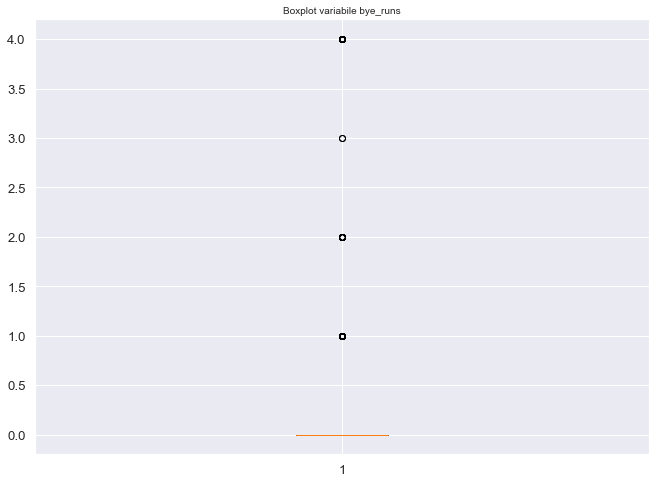

In [231]:
plt.boxplot(deliveries['bye_runs'])
plt.title('Boxplot variabile bye_runs')

Text(0.5, 1.0, 'Boxplot variabile legbye_runs')

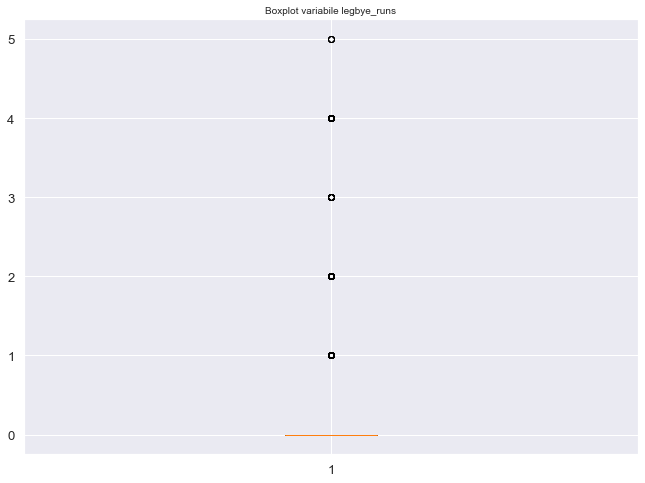

In [232]:
plt.boxplot(deliveries['legbye_runs'])
plt.title('Boxplot variabile legbye_runs')

Text(0.5, 1.0, 'Boxplot variabile batsman_runs')

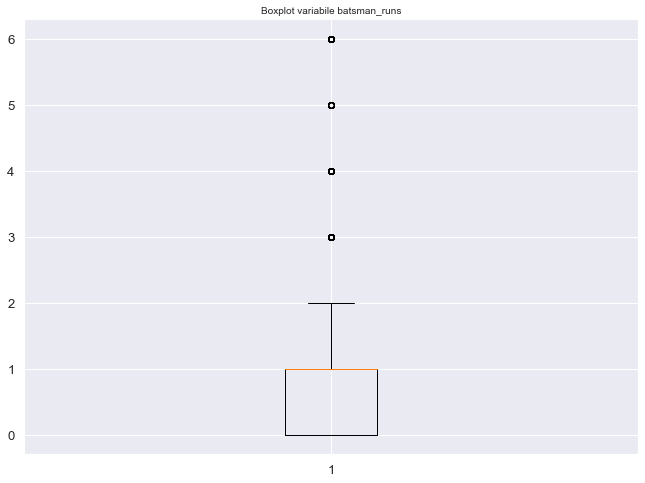

In [233]:
plt.boxplot(deliveries['batsman_runs'])
plt.title('Boxplot variabile batsman_runs')

Text(0.5, 1.0, 'Boxplot variabile noball_runs')

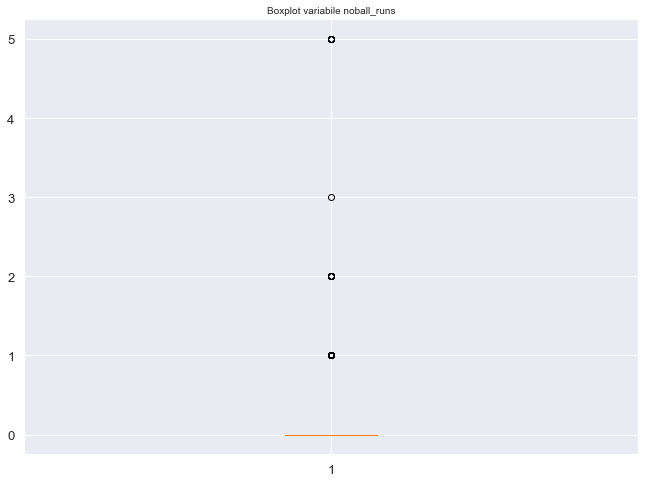

In [234]:
plt.boxplot(deliveries['noball_runs'])
plt.title('Boxplot variabile noball_runs')

Text(0.5, 1.0, 'Boxplot variabile penalty_runs')

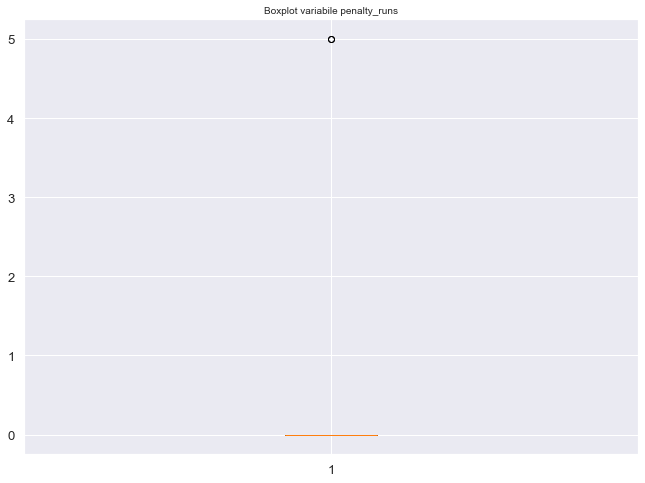

In [235]:
plt.boxplot(deliveries['penalty_runs'])
plt.title('Boxplot variabile penalty_runs')

Text(0.5, 1.0, 'Boxplot variabile total_runs')

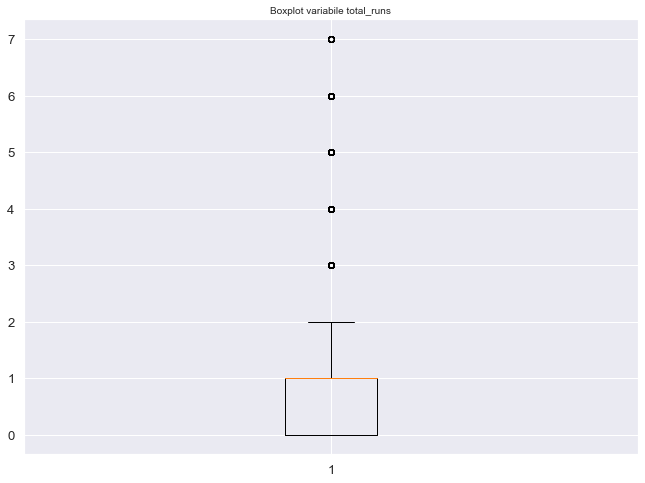

In [236]:
plt.boxplot(deliveries['total_runs'])
plt.title('Boxplot variabile total_runs')

Text(0.5, 1.0, 'Boxplot variabile extra_runs')

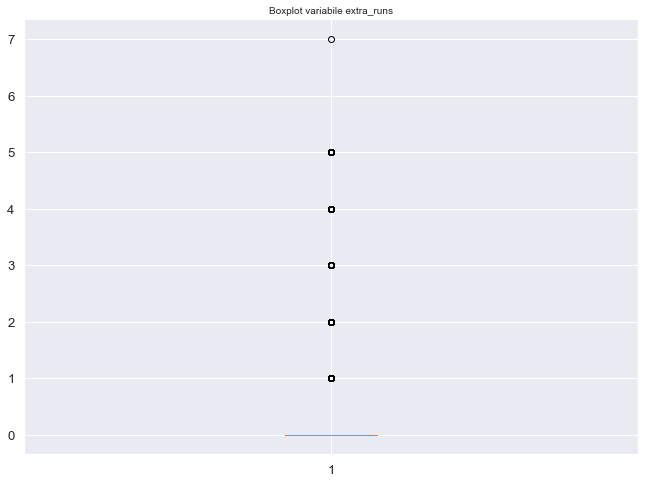

In [237]:
plt.boxplot(deliveries['extra_runs'])
plt.title('Boxplot variabile extra_runs')